**Bollywood Movie Data**

This repository contains the gender and emotion data for all Bollywood Movie Trailers released from 2008 to 2017. 

The following dataset includes the folder :

- __complete-data.csv__: It has gender and emotion information for each of the trailers in the data folder. It has the following columns :
  - frame_number - the frame number of the trailer in which emotion and gender detection occurred
  - man/woman - whether the detected person was a man or a woman
  - emotion - the emotion potrayed by the man/woman detected in the image
  - year - the year in which the movie was released
  - movie_name - the name of the movie

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/complete-data.csv')
dataset

frame_number gender   emotion  year    movie_name
0                28  woman     happy  2014  dedh_ishqiya
1                62  woman     happy  2014  dedh_ishqiya
2                60    man     angry  2014  dedh_ishqiya
3                60    man       sad  2014  dedh_ishqiya
4                60    man     angry  2014  dedh_ishqiya
...             ...    ...       ...   ...           ...
32192            18    man     happy  2016   housefull_3
32193            25    man   neutral  2016   housefull_3
32194            25    man   neutral  2016   housefull_3
32195            25    man     happy  2016   housefull_3
32196            31    man  surprise  2016   housefull_3

[32197 rows x 5 columns]

In [ ]:
#Printing rows with NaN values
dataset[dataset.isna().any(axis=1)]

Empty DataFrame
Columns: [frame_number, gender, emotion, year, movie_name]
Index: []

In [ ]:
#Removing rows with NaN values
dataset = dataset.dropna()

In [ ]:
dataset[["emotion"]].value_counts()

emotion 
neutral     8140
sad         7809
happy       6672
angry       5396
fear        2612
surprise    1267
disgust      301
dtype: int64

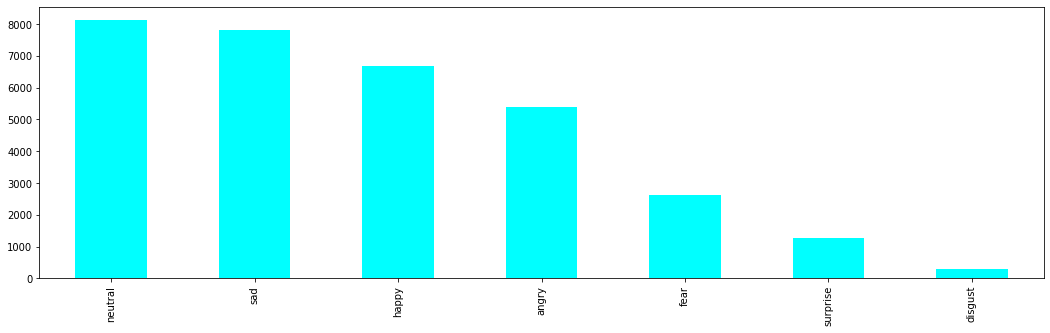

In [ ]:
dataset['emotion'].value_counts().plot.bar(color ='aqua',figsize=(18,5))

In [ ]:
dataset[["year"]].value_counts()

year
2014    5498
2016    4506
2015    4441
2017    4188
2013    3397
2011    2977
2010    2307
2012    2292
2009    1343
2008    1248
dtype: int64

In [ ]:
dataset[["movie_name"]].value_counts()

movie_name           
pizza                    849
love_u                   464
dirty_politics           154
chal_guru_ho_ja_shuru    153
ek_vivaah                151
                        ... 
the_japanese_wife          2
angel                      2
krrish_3                   1
kismat_konnection          1
diwangi_ne_had_kar_di      1
Length: 848, dtype: int64

In [ ]:
dataset[["gender"]].value_counts()

gender
man       22042
woman     10155
dtype: int64

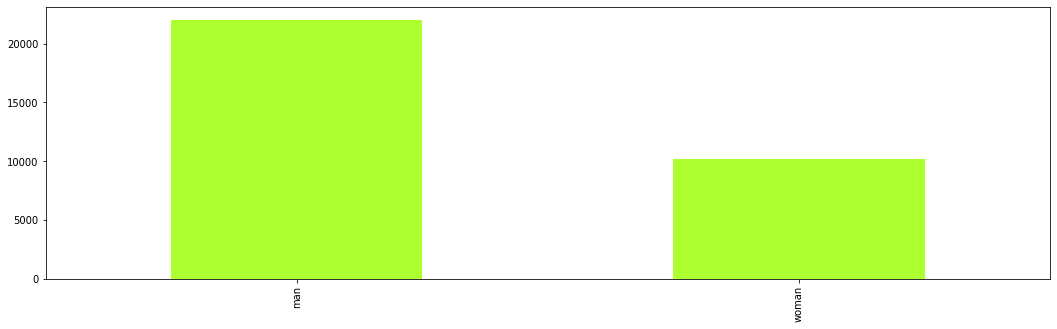

In [ ]:
dataset['gender'].value_counts().sort_index().plot.bar(color ='greenyellow',figsize=(18,5))

In [ ]:
dataset.groupby('gender')

In [ ]:
(dataset['emotion']=='angry').sum()

5396

emotion     angry   disgust      fear     happy   neutral       sad  surprise
gender                                                                       
man      0.192723  0.008529  0.073950  0.189683  0.267217  0.235596  0.032302
woman    0.113048  0.011128  0.096701  0.245298  0.221566  0.257607  0.054653


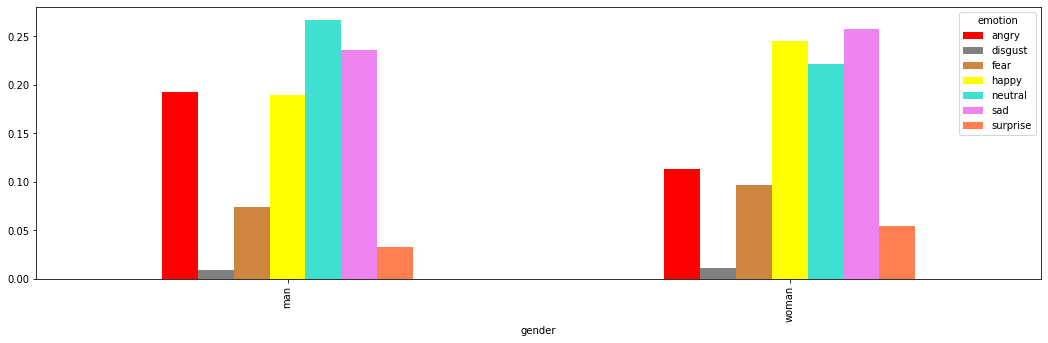

In [ ]:
CrosstabResult=pd.crosstab(index=dataset['gender'],columns=dataset['emotion'],normalize='index')
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(18,5),color=('red','gray','peru','yellow','turquoise','violet','coral'))

gender        man                                                              \
emotion     angry   disgust      fear     happy   neutral       sad  surprise   
year                                                                            
2008     0.122596  0.003205  0.041667  0.140224  0.170673  0.184295  0.020032   
2009     0.142964  0.003723  0.043931  0.122115  0.215190  0.172003  0.019360   
2010     0.132206  0.009103  0.060251  0.132640  0.169051  0.171218  0.019072   
2011     0.111186  0.006046  0.052066  0.127981  0.174337  0.182734  0.017131   
2012     0.145724  0.005672  0.044503  0.159686  0.174956  0.156632  0.025305   
2013     0.136297  0.006182  0.055932  0.128643  0.180159  0.154254  0.023550   
2014     0.127683  0.007275  0.053656  0.172244  0.184249  0.136595  0.022917   
2015     0.136681  0.005629  0.051115  0.119342  0.185544  0.147714  0.020266   
2016     0.130937  0.004882  0.050155  0.102530  0.177097  0.170217  0.021749   
2017     0.136342  0.004537 

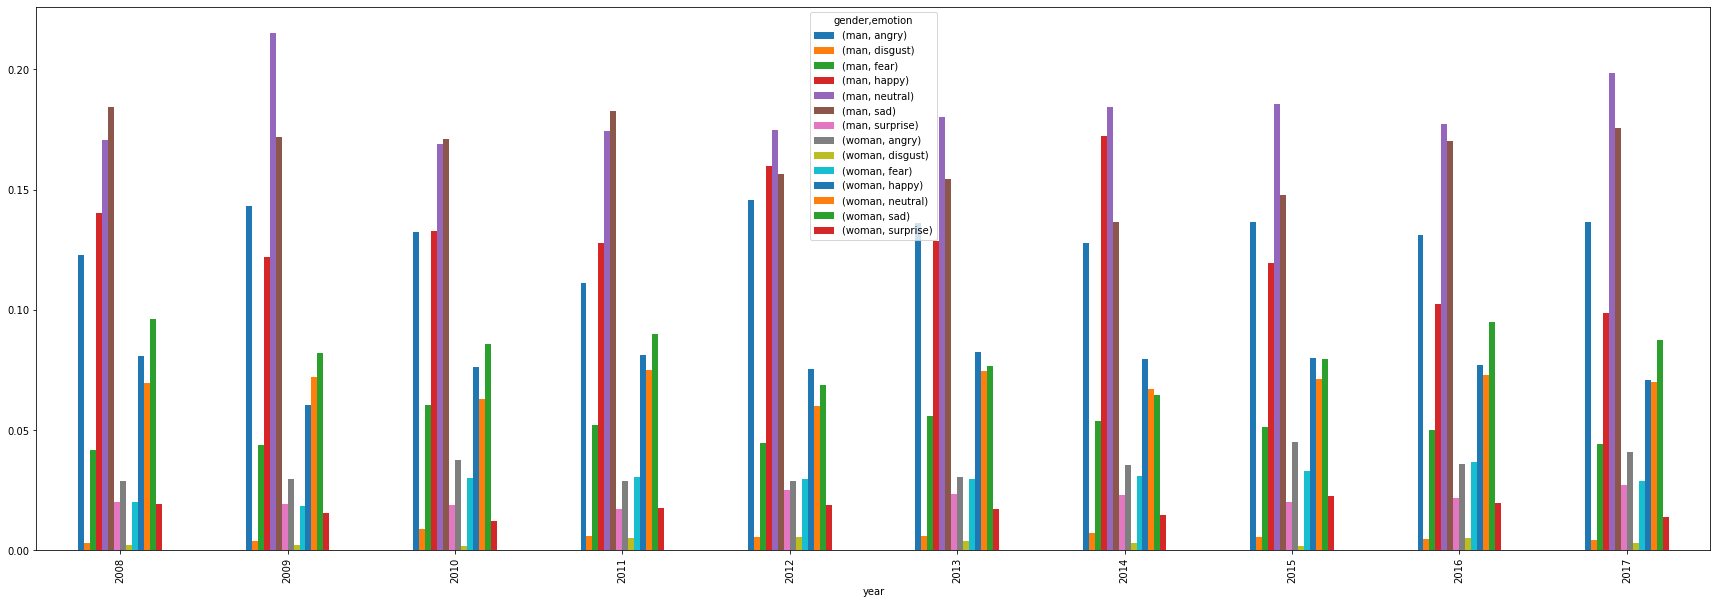

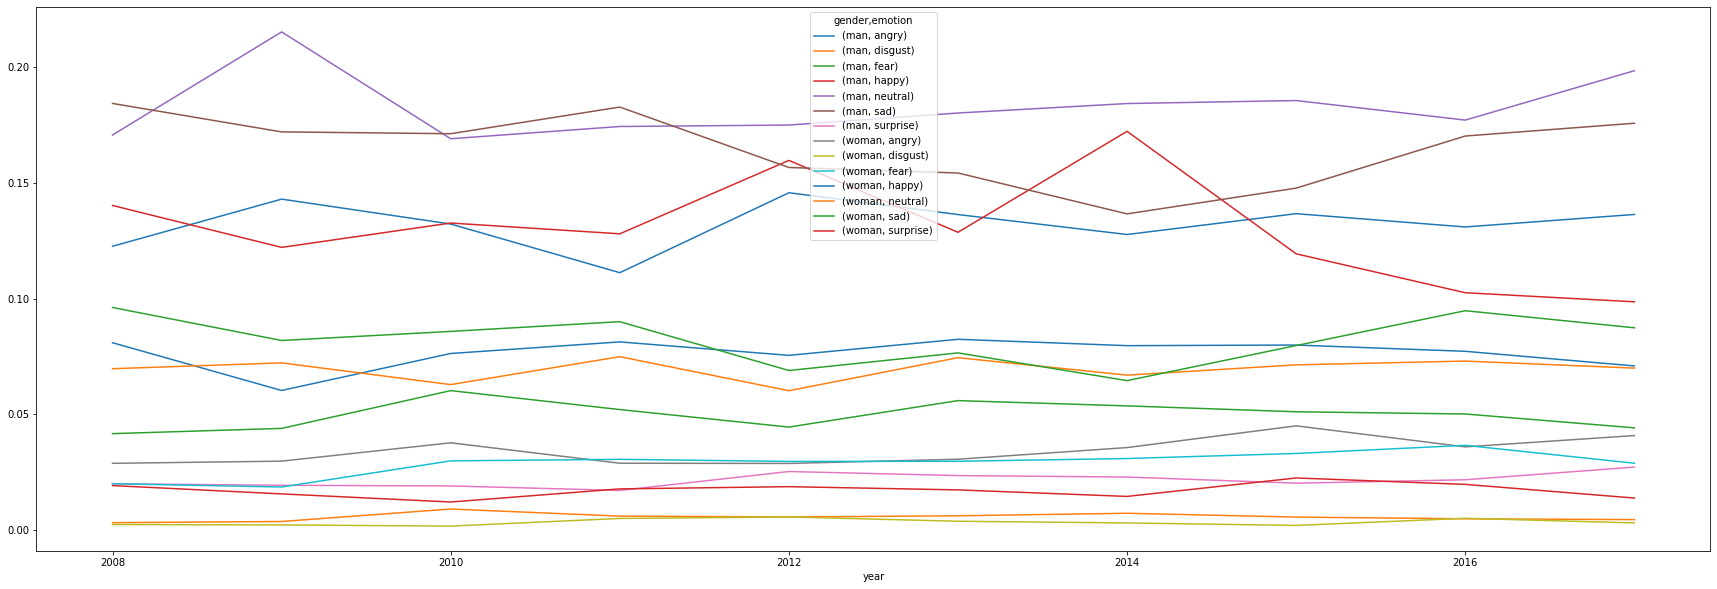

In [ ]:
ct=pd.crosstab(dataset['year'], 
            [dataset['gender'], dataset['emotion']],normalize='index')
print(ct)
ct.plot.bar(figsize=(30,10))
ct.plot.line(figsize=(30,10))

In [ ]:
df = dataset[["gender","emotion","year"]]
df

gender   emotion  year
0      woman     happy  2014
1      woman     happy  2014
2        man     angry  2014
3        man       sad  2014
4        man     angry  2014
...      ...       ...   ...
32192    man     happy  2016
32193    man   neutral  2016
32194    man   neutral  2016
32195    man     happy  2016
32196    man  surprise  2016

[32197 rows x 3 columns]

In [ ]:
dfa = df[dataset['emotion']=='angry']
dfa

gender emotion  year
2        man   angry  2014
4        man   angry  2014
13       man   angry  2014
18       man   angry  2014
43       man   angry  2014
...      ...     ...   ...
32154    man   angry  2016
32167  woman   angry  2016
32169    man   angry  2016
32175    man   angry  2016
32188    man   angry  2016

[5396 rows x 3 columns]

gender        man     woman
emotion     angry     angry
year                       
2008     0.809524  0.190476
2009     0.827586  0.172414
2010     0.778061  0.221939
2011     0.793765  0.206235
2012     0.835000  0.165000
2013     0.816578  0.183422
2014     0.781737  0.218263
2015     0.752169  0.247831
2016     0.784574  0.215426
2017     0.769542  0.230458


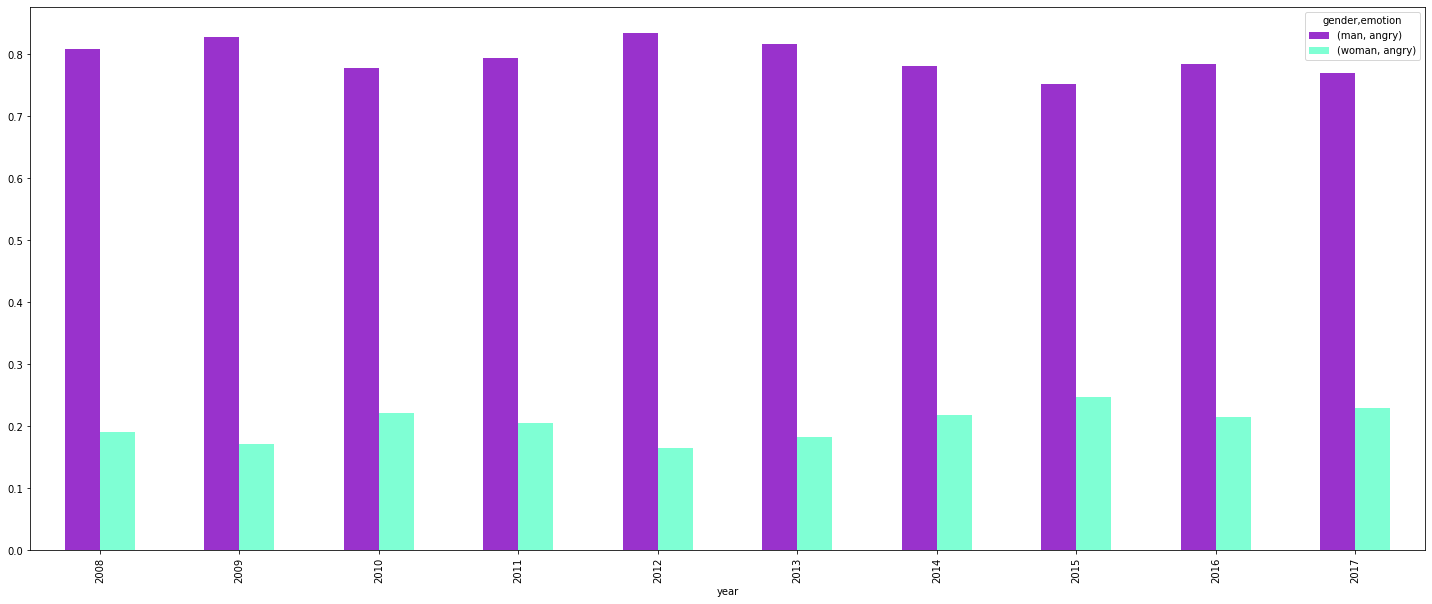

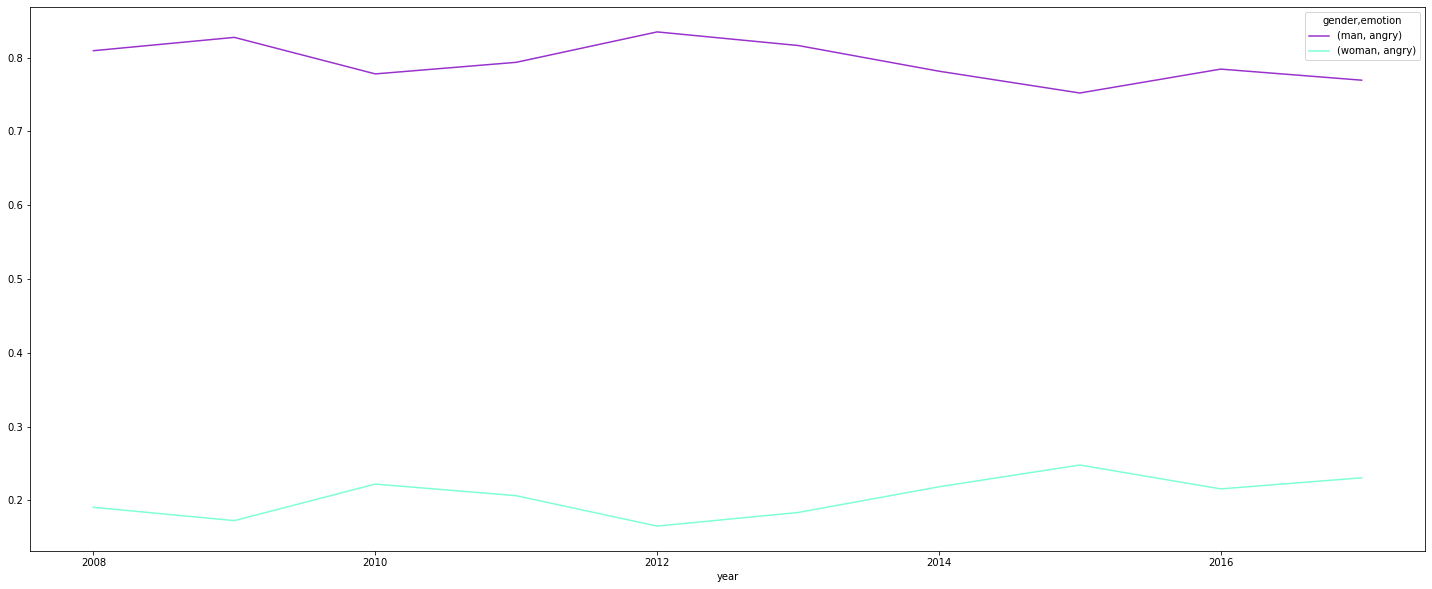

In [ ]:
cta=pd.crosstab(dfa['year'], [dfa['gender'], dfa['emotion']],normalize='index')
print(cta)
cta.plot.bar(figsize=(25,10),color=('darkorchid','aquamarine'))
cta.plot.line(figsize=(25,10),color=('darkorchid','aquamarine'))

In [ ]:
dfh = df[dataset['emotion']=='happy']
dfh

gender emotion  year
0      woman   happy  2014
1      woman   happy  2014
6      woman   happy  2014
16       man   happy  2014
19     woman   happy  2014
...      ...     ...   ...
32184    man   happy  2016
32187    man   happy  2016
32191  woman   happy  2016
32192    man   happy  2016
32195    man   happy  2016

[6672 rows x 3 columns]

gender        man     woman
emotion     happy     happy
year                       
2008     0.041856  0.040546
2009     0.039225  0.032517
2010     0.073188  0.070654
2011     0.091127  0.097150
2012     0.087539  0.069450
2013     0.104520  0.112405
2014     0.226501  0.175833
2015     0.126764  0.142513
2016     0.110500  0.139703
2017     0.098780  0.119229


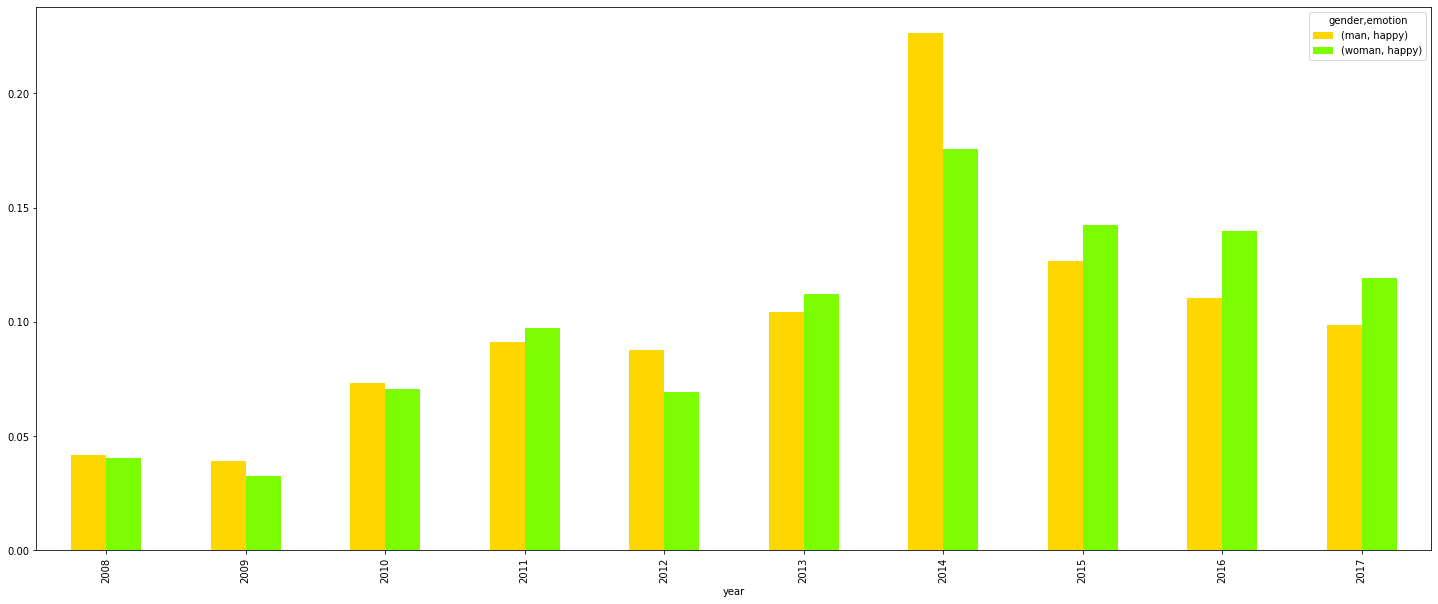

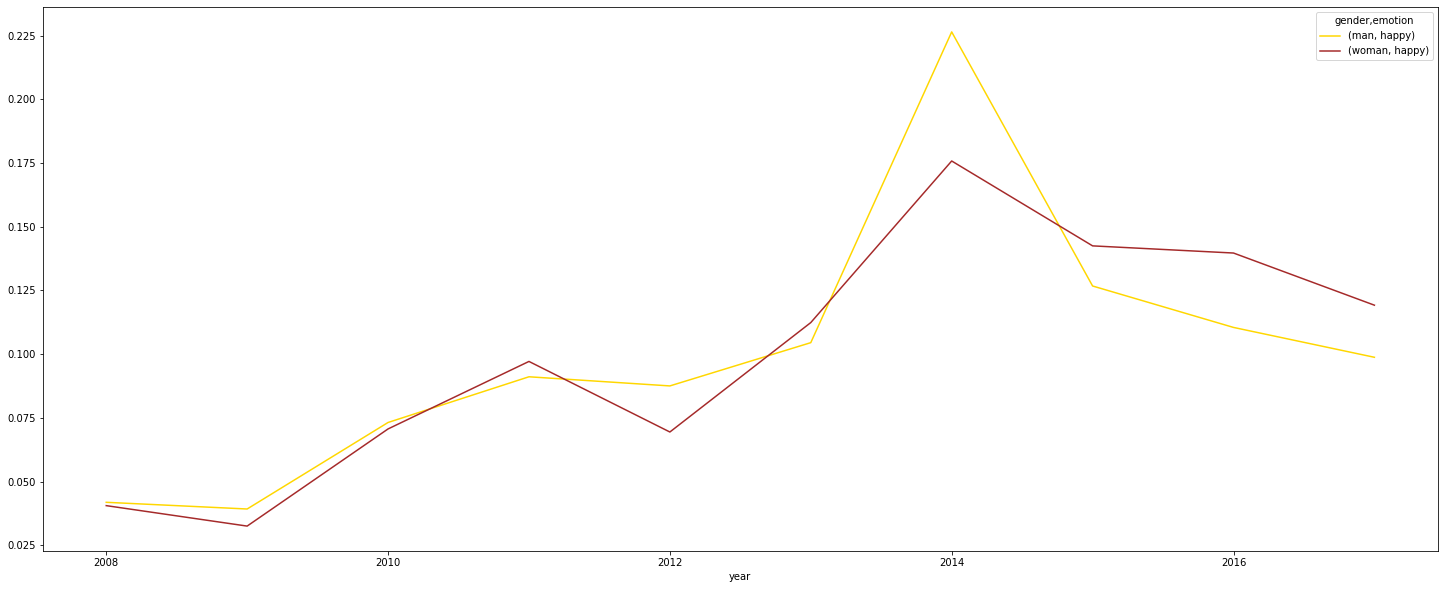

In [ ]:
cth=pd.crosstab(dfh['year'], [dfh['gender'], dfh['emotion']],normalize='columns')
print(cth)
cth.plot.bar(figsize=(25,10),color=('gold','lawngreen'))
cth.plot.line(figsize=(25,10),color=('gold','brown'))

In [ ]:
#Predict gender based on emotions using random forest classifier

emotion_dict = {'neutral' : 1, 'sad' : 2, 'happy' : 3, 'angry' : 4, 'fear' : 5, 
                   'surprise' : 6, 'disgust':7}
dataset['emotion'] = dataset['emotion'].map(emotion_dict)

In [ ]:
X = dataset[['emotion']]
y = dataset[['gender']]
print(X)
print(y)

       emotion
0            3
1            3
2            4
3            2
4            4
...        ...
32192        3
32193        1
32194        1
32195        3
32196        6

[32197 rows x 1 columns]
      gender
0      woman
1      woman
2        man
3        man
4        man
...      ...
32192    man
32193    man
32194    man
32195    man
32196    man

[32197 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=101)
print(X_train)
print(X_test)
print(y_train)
print(y_test)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators = 120, criterion = 'entropy', max_depth = 10)
rf.fit (X_train, y_train)

       emotion
14242        5
16118        3
4282         5
21051        4
4196         3
...        ...
5695         2
8006         3
17745        4
17931        3
13151        4

[16098 rows x 1 columns]
       emotion
7870         3
25462        4
31808        3
15992        1
10823        4
...        ...
31915        1
22075        1
4645         2
16848        2
12205        3

[16099 rows x 1 columns]
      gender
14242    man
16118    man
4282     man
21051  woman
4196     man
...      ...
5695   woman
8006     man
17745    man
17931    man
13151  woman

[16098 rows x 1 columns]
      gender
7870     man
25462    man
31808  woman
15992    man
10823    man
...      ...
31915  woman
22075    man
4645     man
16848    man
12205  woman

[16099 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=120)

In [ ]:
y_pred_rf = rf.predict(X_test)
print (y_pred_rf)
print(y_pred_rf.shape)
print(y_pred_rf)

['man' 'man' 'man' ... 'man' 'man' 'man']
(16099,)
['man' 'man' 'man' ... 'man' 'man' 'man']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred_rf))
print (accuracy_score(y_test, y_pred_rf)*100)
print (classification_report(y_test, y_pred_rf))

[[11081     0]
 [ 5018     0]]
68.83036213429405


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         man       0.69      1.00      0.82     11081
       woman       0.00      0.00      0.00      5018

    accuracy                           0.69     16099
   macro avg       0.34      0.50      0.41     16099
weighted avg       0.47      0.69      0.56     16099



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_rf = rf.predict([[4]])
print (y_pred_rf)

['man']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred_rf = rf.predict([[3]])
print (y_pred_rf)

['man']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred_rf = rf.predict([[6]])
print (y_pred_rf)

['man']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Wikipedia Data

This folder contains data collected from wikipedia for bollywood movies. Also, it contains the data files which have been generated by processing the wikipedia output. Details of each file is given as follows -

	female_adjectives.csv - Contains adjectives used for females extracted using Stanford Dependency Parser
	female_adjverb.csv - Contains adjectives and verbs generated using Stanford Dependency Parser
	female_mentions_centrality.csv - Contains centrality and mentions of females in movies
	female_verb.csv - Contains verbs used for females generated using Stanford Dependency Parser
	male_adjectives.csv - Contains adjectives used for males extracted using Stanford Dependency Parser
	male_adjverb.csv 	- Contains adjectives and verbs generated using Stanford Dependency Parser
	male_mentions_centrality.csv 	- Contains centrality and mentions of males in movies in text
	male_verb.csv	- Contains verbs used for males generated using Stanford Dependency Parser
	songsDB.csv - contains sountrack information
	songsFrequency.csv- contains soundtrack frequency

Adjectives used with **Females**

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/female_adjectivesCopy.csv',header=None)
dataset

0               1    2    3    4    5    6
0     1970           young  NaN  NaN  NaN  NaN  NaN
1     1970             NaN  NaN  NaN  NaN  NaN  NaN
2     1970             NaN  NaN  NaN  NaN  NaN  NaN
3     1970             NaN  NaN  NaN  NaN  NaN  NaN
4     1970  unrecognizable  NaN  NaN  NaN  NaN  NaN
...    ...             ...  ...  ...  ...  ...  ...
5053  2008             NaN  NaN  NaN  NaN  NaN  NaN
5054  2008             NaN  NaN  NaN  NaN  NaN  NaN
5055  1971             NaN  NaN  NaN  NaN  NaN  NaN
5056  1971            long  NaN  NaN  NaN  NaN  NaN
5057  1971       beautiful  NaN  NaN  NaN  NaN  NaN

[5058 rows x 7 columns]

In [ ]:
df = dataset[dataset[1].notna()]
df

0               1    2    3    4    5    6
0     1970           young  NaN  NaN  NaN  NaN  NaN
4     1970  unrecognizable  NaN  NaN  NaN  NaN  NaN
9     1970          sister  NaN  NaN  NaN  NaN  NaN
18    1970            real  NaN  NaN  NaN  NaN  NaN
21    1970           young  NaN  NaN  NaN  NaN  NaN
...    ...             ...  ...  ...  ...  ...  ...
5035  2008         widowed  NaN  NaN  NaN  NaN  NaN
5044  2008          Indian  NaN  NaN  NaN  NaN  NaN
5045  2008           young  NaN  NaN  NaN  NaN  NaN
5056  1971            long  NaN  NaN  NaN  NaN  NaN
5057  1971       beautiful  NaN  NaN  NaN  NaN  NaN

[1326 rows x 7 columns]

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
df[1]=df[1].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
type(df[1])

pandas.core.series.Series

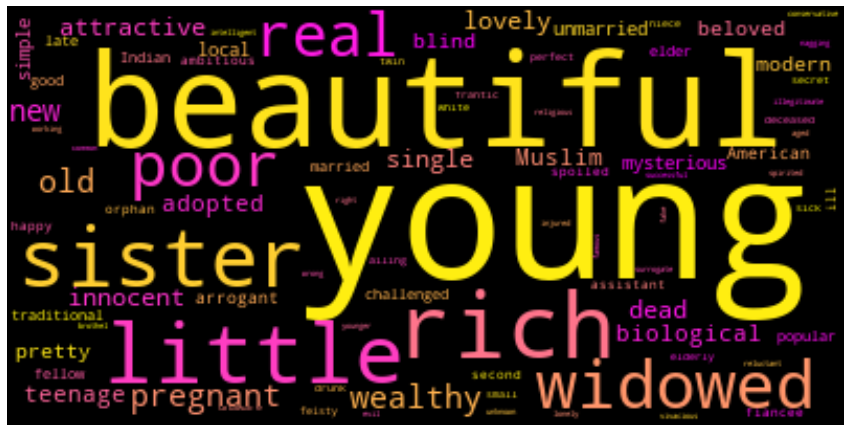

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(colormap='spring').generate(' '.join(df[1]))

# Display the generated image:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

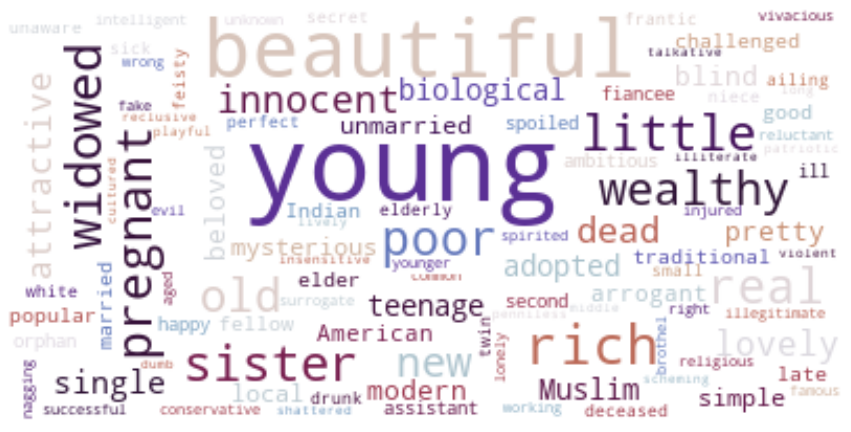

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",colormap='twilight').generate(' '.join(df[1]))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Adjectives used with **Males**

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/male_adjectives.csv',header=None)
dataset

0           1    2    3    4    5    6
0     1970         NaN  NaN  NaN  NaN  NaN  NaN
1     1970  unhappilly  NaN  NaN  NaN  NaN  NaN
2     1970         NaN  NaN  NaN  NaN  NaN  NaN
3     1970         NaN  NaN  NaN  NaN  NaN  NaN
4     1970      famous  NaN  NaN  NaN  NaN  NaN
...    ...         ...  ...  ...  ...  ...  ...
9375  1971         NaN  NaN  NaN  NaN  NaN  NaN
9376  1971         NaN  NaN  NaN  NaN  NaN  NaN
9377  1971         NaN  NaN  NaN  NaN  NaN  NaN
9378  1971     widowed  NaN  NaN  NaN  NaN  NaN
9379  1971         NaN  NaN  NaN  NaN  NaN  NaN

[9380 rows x 7 columns]

In [ ]:
df = dataset[dataset[1].notna()]
df

0           1       2         3    4    5    6
1     1970  unhappilly     NaN       NaN  NaN  NaN  NaN
4     1970      famous     NaN       NaN  NaN  NaN  NaN
5     1970         shy   young       NaN  NaN  NaN  NaN
9     1970     general     NaN       NaN  NaN  NaN  NaN
10    1970       cruel     NaN       NaN  NaN  NaN  NaN
...    ...         ...     ...       ...  ...  ...  ...
9349  2007      middle   armed   regular  NaN  NaN  NaN
9360  2008        rich     NaN       NaN  NaN  NaN  NaN
9369  2008   reluctant     NaN       NaN  NaN  NaN  NaN
9371  2008   reluctant     NaN       NaN  NaN  NaN  NaN
9378  1971     widowed     NaN       NaN  NaN  NaN  NaN

[1778 rows x 7 columns]

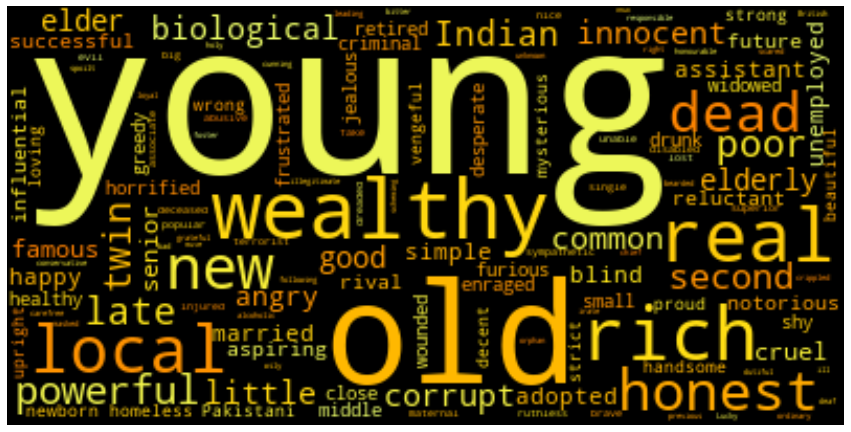

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(colormap='Wistia').generate(' '.join(df[1]))

# Display the generated image:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

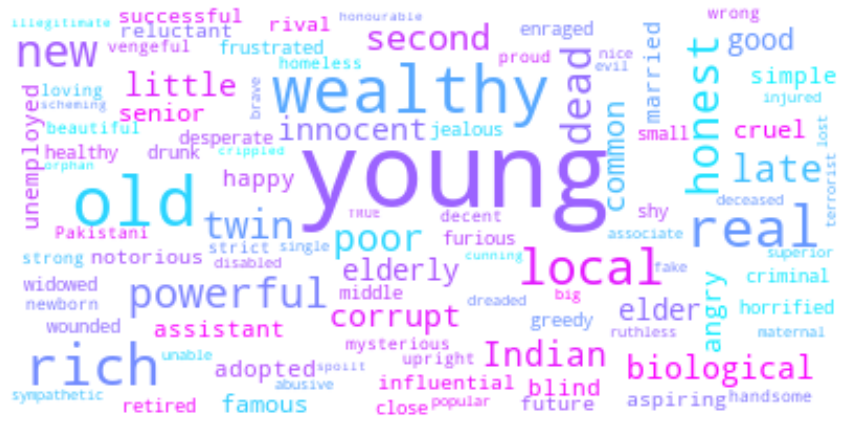

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",colormap='cool').generate(' '.join(df[1]))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Adverbs used with **Females**

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/female_adjverb.csv',header=None)
dataset

0           1           2               3    4    5    6    7    8   \
0     1970  introduces       young             NaN  NaN  NaN  NaN  NaN  NaN   
1     1970     decides         NaN             NaN  NaN  NaN  NaN  NaN  NaN   
2     1970       moves         NaN             NaN  NaN  NaN  NaN  NaN  NaN   
3     1970       finds       stops             NaN  NaN  NaN  NaN  NaN  NaN   
4     1970       comes       takes  unrecognizable  NaN  NaN  NaN  NaN  NaN   
...    ...         ...         ...             ...  ...  ...  ...  ...  ...   
2098  2009       tries      breaks            sees  NaN  NaN  NaN  NaN  NaN   
2099  2009      brings   discusses             NaN  NaN  NaN  NaN  NaN  NaN   
2100  2009       wants         NaN             NaN  NaN  NaN  NaN  NaN  NaN   
2101  2009         NaN       young            sexy  NaN  NaN  NaN  NaN  NaN   
2102  2009       finds        runs             NaN  NaN  NaN  NaN  NaN  NaN   

       9    10   11   12   13  
0     NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  
2098  NaN  NaN  NaN  NaN  NaN  
2099  NaN  NaN  NaN  NaN  NaN  
2100  NaN  NaN  NaN  NaN  NaN  
2101  NaN  NaN  NaN  NaN  NaN  
2102  NaN  NaN  NaN  NaN  NaN  

[2103 rows x 14 columns]

In [ ]:
df = dataset[dataset[1].notna()]
df.iloc[:,[0,1]]

0           1
0     1970  introduces
1     1970     decides
2     1970       moves
3     1970       finds
4     1970       comes
...    ...         ...
2096  2009     induces
2098  2009       tries
2099  2009      brings
2100  2009       wants
2102  2009       finds

[1080 rows x 2 columns]

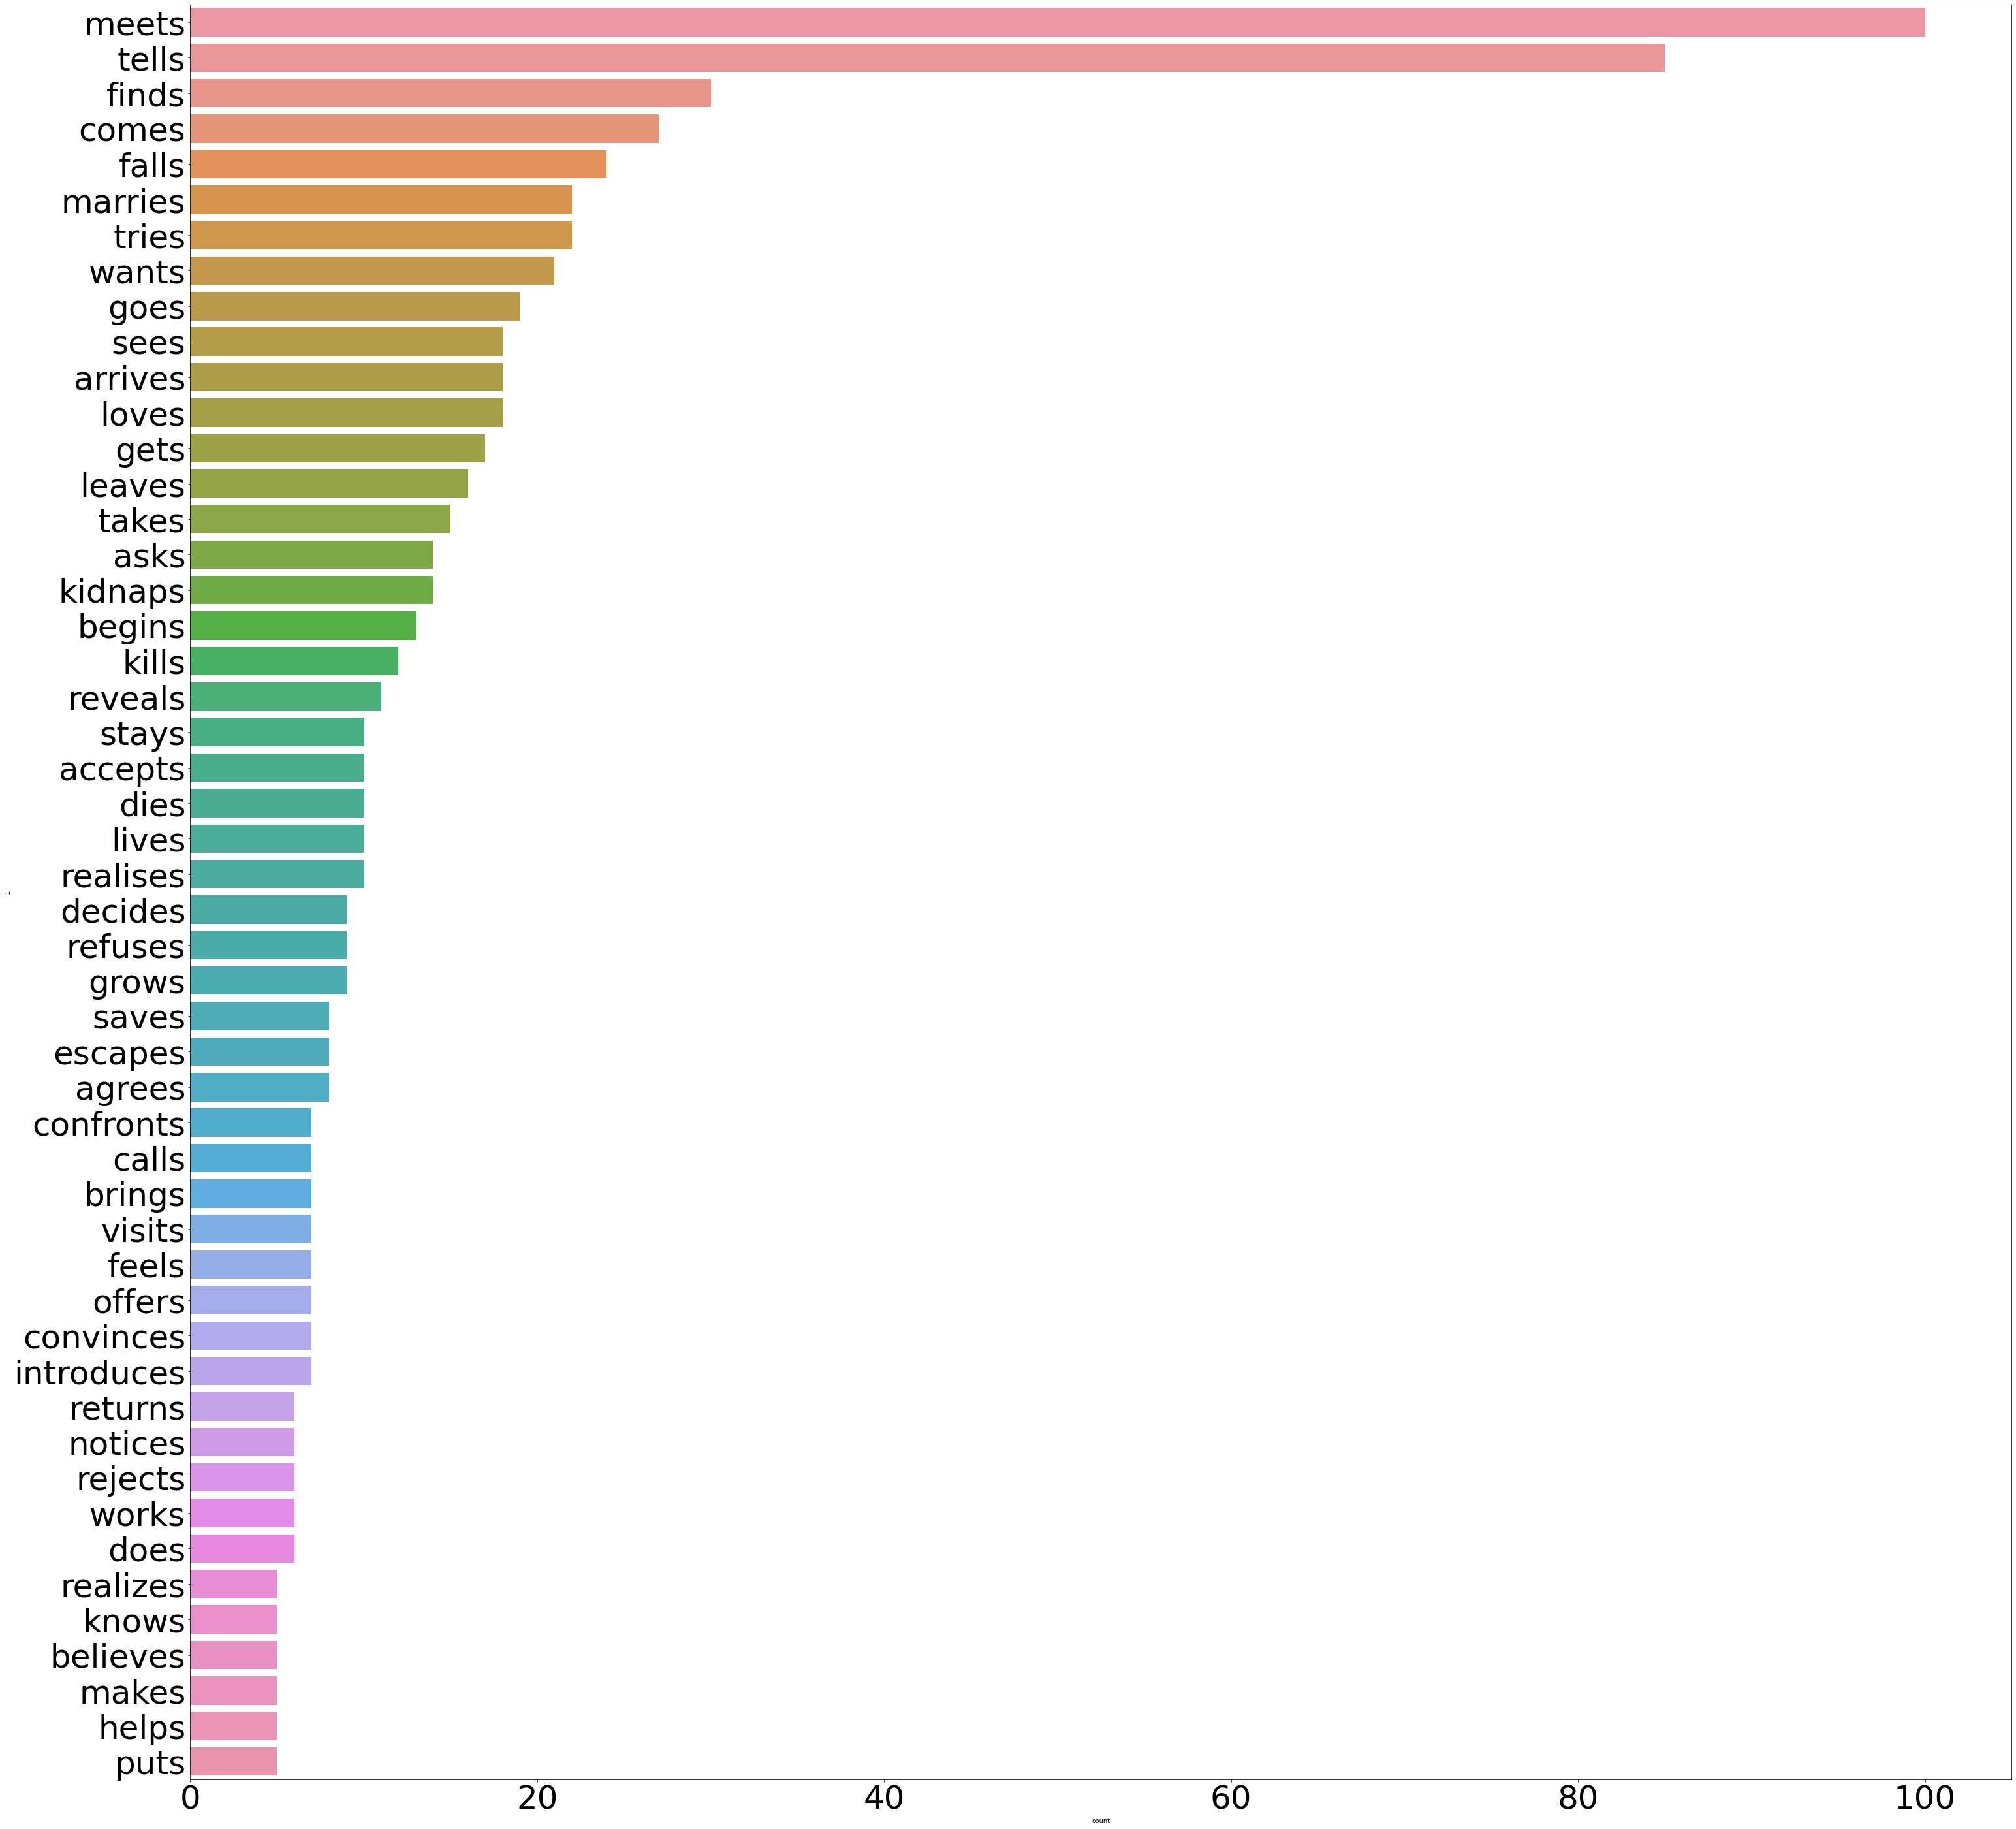

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,50))
plt.yticks(size=50)
plt.xticks(size=50)
ax = sns.countplot(y=df[1],data=df, order=df[1].value_counts().iloc[:50].index)

**Adverbs** used with **Males**

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/male_adjverb.csv',header=None)
dataset

0          1           2            3    4    5    6    7    8    9   \
0     1970  convinces         NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1     1970        NaN  unhappilly          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2     1970      lives         NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     1970      lives         NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     1970        NaN      famous          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...    ...        ...         ...          ...  ...  ...  ...  ...  ...  ...   
3860  2009      wakes    suspects       starts  NaN  NaN  NaN  NaN  NaN  NaN   
3861  2009        NaN         NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3862  2009        NaN         NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3863  2009        NaN         NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3864  2009        NaN    favorite   successful  NaN  NaN  NaN  NaN  NaN  NaN   

      ...   14   15   16   17   18   19   20   21   22   23  
0     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
3860  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3861  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3862  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3863  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3864  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3865 rows x 24 columns]

In [ ]:
df = dataset[dataset[1].notna()]
df.iloc[:,[0,1]]

0          1
0     1970  convinces
2     1970      lives
3     1970      lives
6     1970     offers
8     1970       gets
...    ...        ...
3853  2009     enters
3855  2009      finds
3856  2009     brings
3858  2009      tells
3860  2009      wakes

[2048 rows x 2 columns]

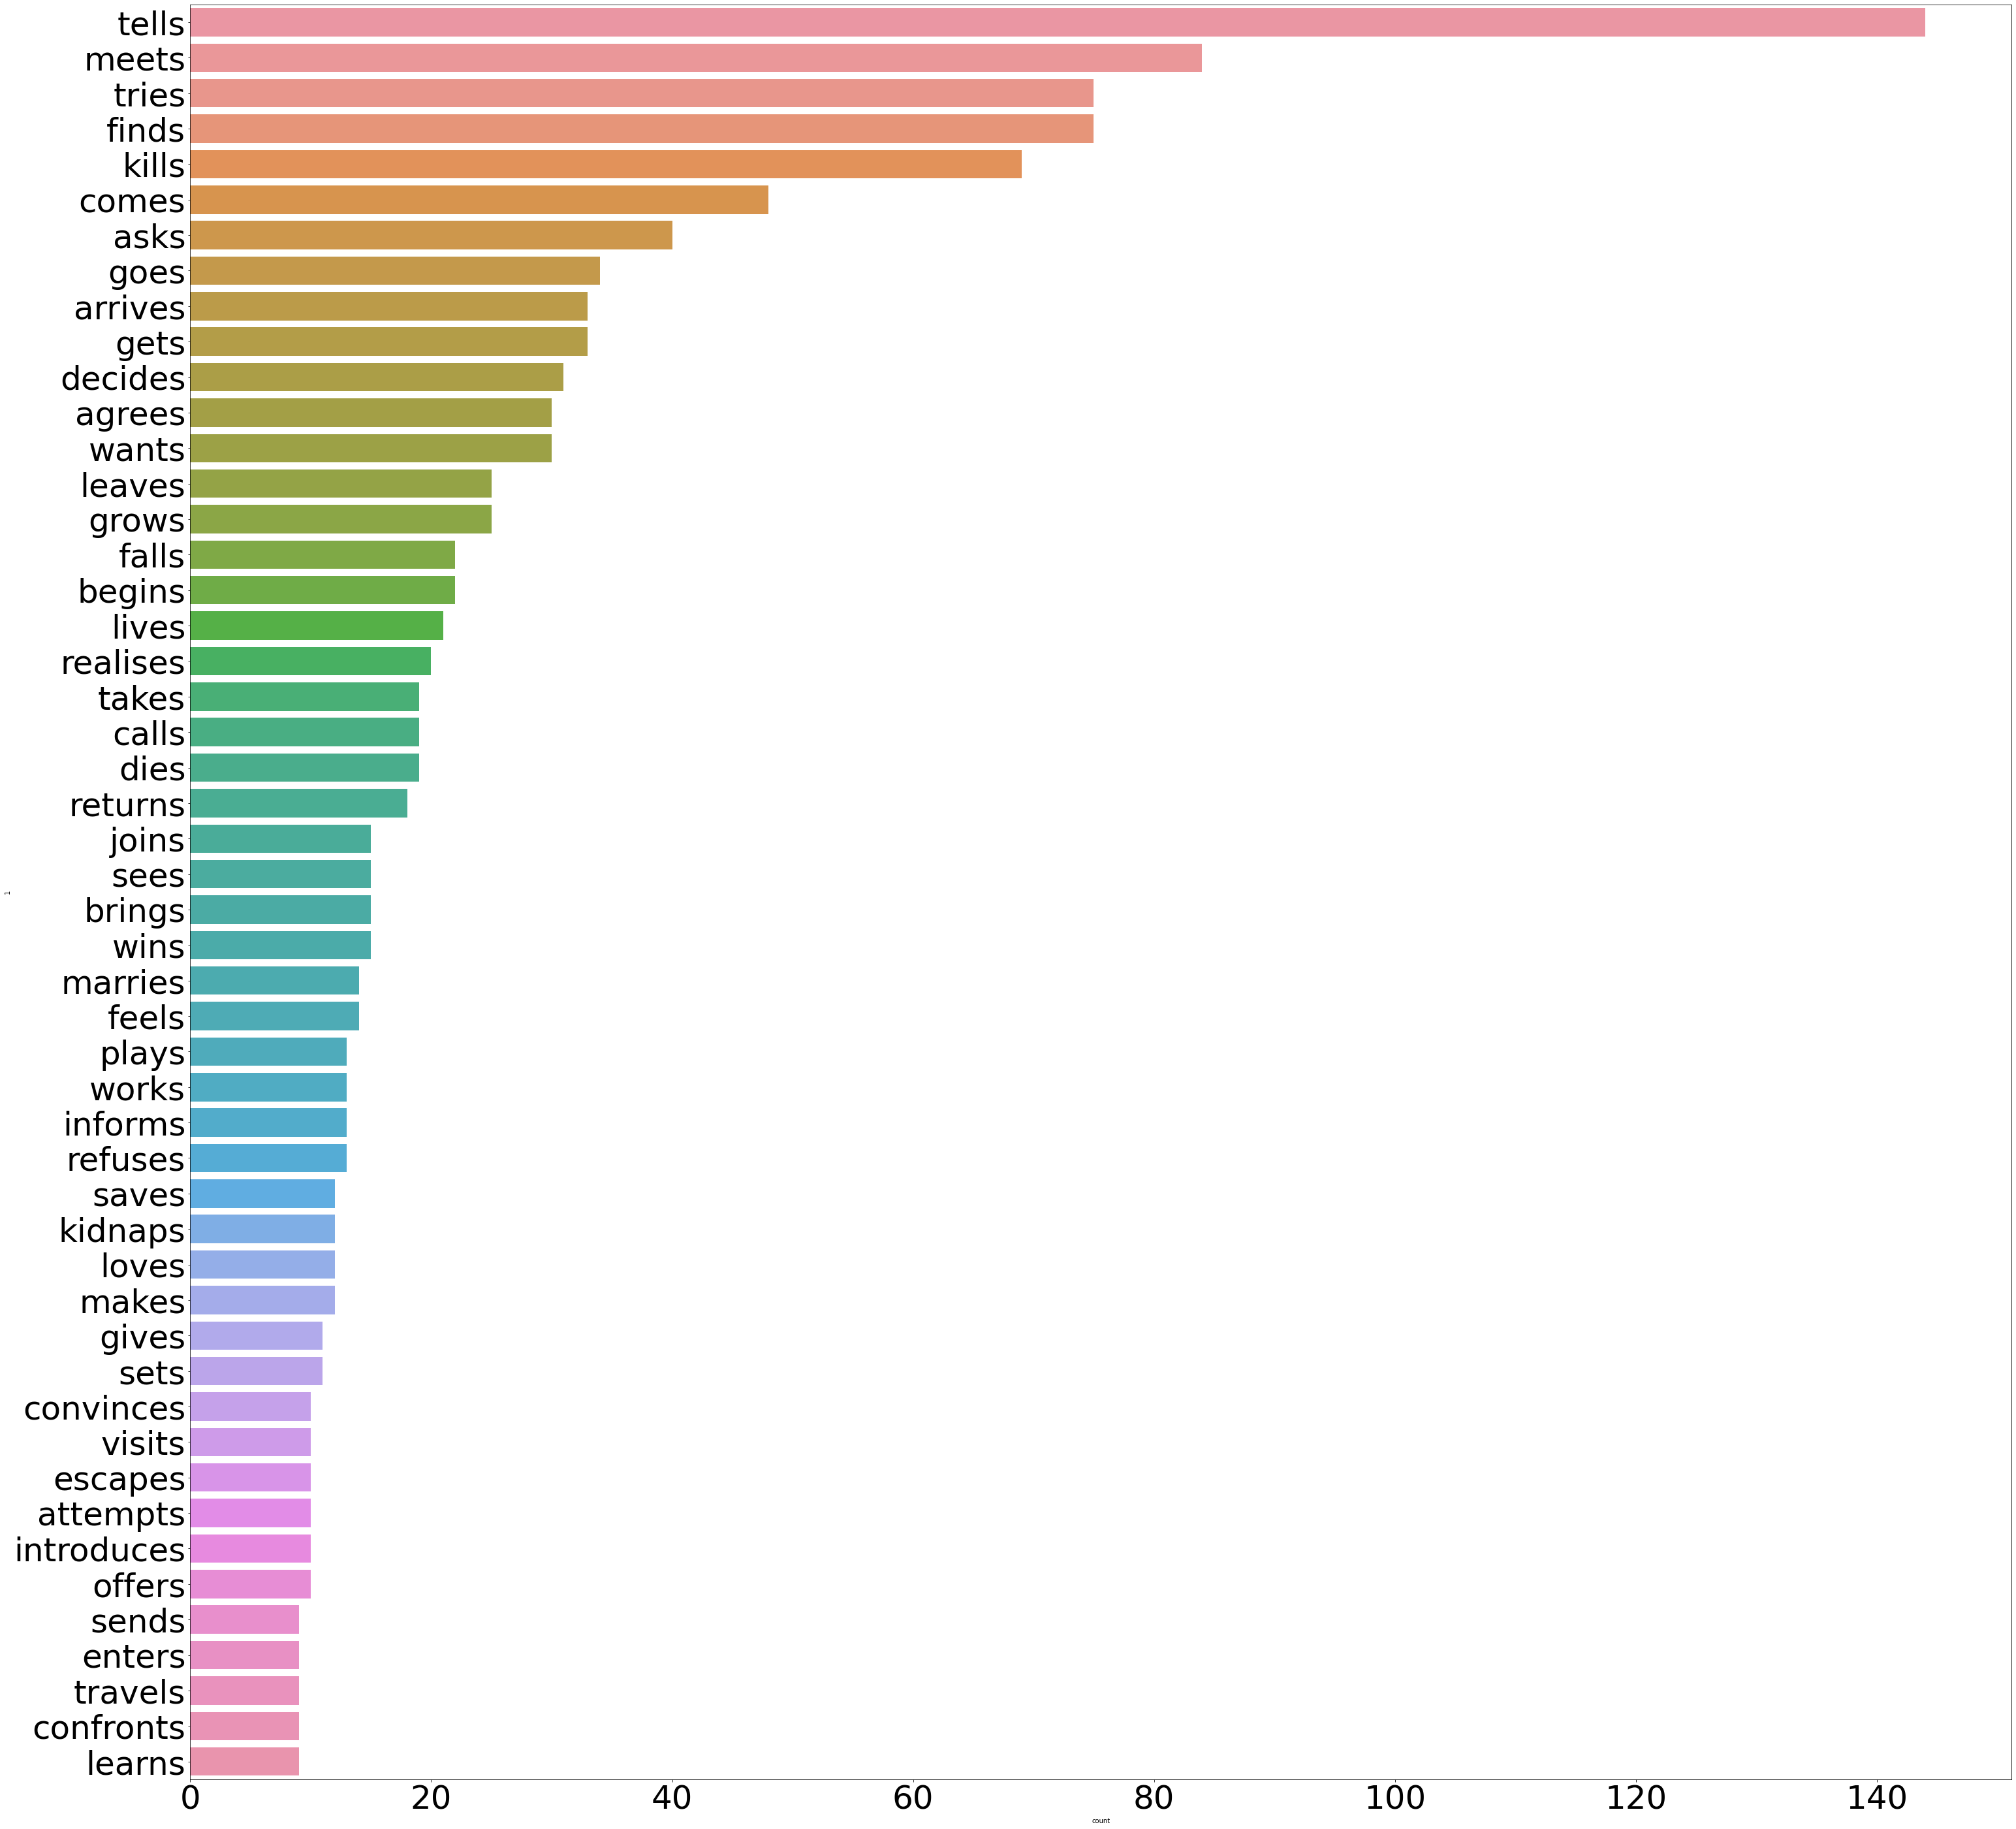

In [ ]:
plt.figure(figsize=(50,50))
plt.yticks(size=50)
plt.xticks(size=50)
ax = sns.countplot(y=df[1],data=df, order=df[1].value_counts().iloc[:50].index)

Verbs used with **Females**

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/female_verb.csv',header=None)
dataset

0           1         2           3         4          5       6   \
0     1970  introduces       NaN         NaN       NaN        NaN     NaN   
1     1970     decides       NaN         NaN       NaN        NaN     NaN   
2     1970       moves       NaN         NaN       NaN        NaN     NaN   
3     1970       finds     stops         NaN       NaN        NaN     NaN   
4     1970       comes     takes         NaN       NaN        NaN     NaN   
...    ...         ...       ...         ...       ...        ...     ...   
5053  2008     arrives       NaN         NaN       NaN        NaN     NaN   
5054  2008       tells      sees        goes      asks   forgives   wants   
5055  1971       cries    agrees       meets   accepts      loves    asks   
5056  1971         NaN       NaN         NaN       NaN        NaN     NaN   
5057  1971       comes   refuses   discovers      gets        NaN     NaN   

            7           8           9   ...   13   14   15   16   17   18  \
0          NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
1          NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
2          NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
3          NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
4          NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...         ...         ...  ...  ...  ...  ...  ...  ...  ...   
5053       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
5054   invites   discovers   irritates  ...  NaN  NaN  NaN  NaN  NaN  NaN   
5055    starts         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
5056       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
5057       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   

       19   20   21   22  
0     NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  
5053  NaN  NaN  NaN  NaN  
5054  NaN  NaN  NaN  NaN  
5055  NaN  NaN  NaN  NaN  
5056  NaN  NaN  NaN  NaN  
5057  NaN  NaN  NaN  NaN  

[5058 rows x 23 columns]

In [ ]:
df = dataset[dataset[5].notna()]
df

0        1          2          3            4             5   \
8     1970    tells   performs     agrees   introduces      believes   
39    1970    feels      lives      warns       rushes         takes   
42    1970    grows      feels    admires        meets        thinks   
43    1970   visits      finds     starts   disappears   understands   
47    1970    traps     trusts   believes        plans      pretends   
...    ...      ...        ...        ...          ...           ...   
5016  2007  arrives    escapes      calls    convinces       marries   
5026  2007  notices      finds       asks        wants   experiences   
5040  2008    tells   concedes    ignores         asks       marries   
5054  2008    tells       sees       goes         asks      forgives   
5055  1971    cries     agrees      meets      accepts         loves   

             6         7           8           9   ...   13   14   15   16  \
8          asks     takes         NaN         NaN  ...  NaN  NaN  NaN  NaN   
39     pacifies       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN   
42          NaN       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN   
43          NaN       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN   
47          NaN       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN   
...         ...       ...         ...         ...  ...  ...  ...  ...  ...   
5016   explains    shoots         NaN         NaN  ...  NaN  NaN  NaN  NaN   
5026      gives       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN   
5040        NaN       NaN         NaN         NaN  ...  NaN  NaN  NaN  NaN   
5054      wants   invites   discovers   irritates  ...  NaN  NaN  NaN  NaN   
5055       asks    starts         NaN         NaN  ...  NaN  NaN  NaN  NaN   

       17   18   19   20   21   22  
8     NaN  NaN  NaN  NaN  NaN  NaN  
39    NaN  NaN  NaN  NaN  NaN  NaN  
42    NaN  NaN  NaN  NaN  NaN  NaN  
43    NaN  NaN  NaN  NaN  NaN  NaN  
47    NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  
5016  NaN  NaN  NaN  NaN  NaN  NaN  
5026  NaN  NaN  NaN  NaN  NaN  NaN  
5040  NaN  NaN  NaN  NaN  NaN  NaN  
5054  NaN  NaN  NaN  NaN  NaN  NaN  
5055  NaN  NaN  NaN  NaN  NaN  NaN  

[416 rows x 23 columns]

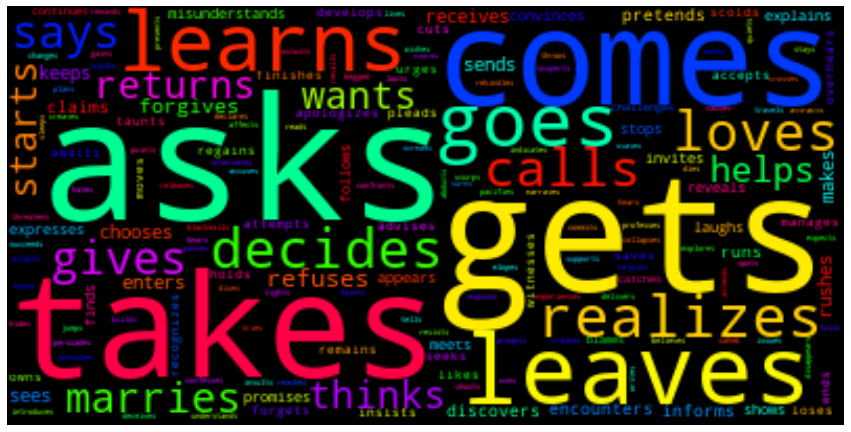

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(colormap='hsv').generate(' '.join(df[5]))

# Display the generated image:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Verbs used with **Males**

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/male_verb.csv',header=None)
dataset

0          1          2       3         4       5       6    7    8   \
0     1970  convinces        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
1     1970        NaN        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
2     1970      lives        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
3     1970      lives        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
4     1970        NaN        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
...    ...        ...        ...     ...       ...     ...     ...  ...  ...   
9375  1971        NaN        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
9376  1971       gets        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
9377  1971      grows   searches   meets   suffers   comes   takes  NaN  NaN   
9378  1971      moves        NaN     NaN       NaN     NaN     NaN  NaN  NaN   
9379  1971      comes        NaN     NaN       NaN     NaN     NaN  NaN  NaN   

       9   ...   17   18   19   20   21   22   23   24   25   26  
0     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
9375  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9376  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9377  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9378  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9379  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[9380 rows x 27 columns]

In [ ]:
df = dataset[dataset[5].notna()]
df

0         1           2           3           4           5        6   \
32    1970  searches     rescues       takes      starts       keeps      NaN   
69    1970     tells       meets        sees     exposes     decides    comes   
75    1971     meets      brings       slips        goes       stops      NaN   
87    1971     tells       tries   confronts      leaves        sees      NaN   
102   1971     tells   announces       loves       comes      probes   starts   
...    ...       ...         ...         ...         ...         ...      ...   
9347  2007    agrees       meets      breaks      pleads      knocks    beats   
9357  2008    begins        sets        sees        goes      phones    takes   
9362  2008     meets     figures       sells        goes    realizes     lies   
9369  2008    evicts        asks      kisses   persuades   discovers      NaN   
9377  1971     grows    searches       meets     suffers       comes    takes   

              7            8      9   ...      17   18   19   20   21   22  \
32           NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
69     threatens       proves    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
75           NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
87           NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
102         gets          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
...          ...          ...    ...  ...     ...  ...  ...  ...  ...  ...   
9347     refuses   approaches   gets  ...   knows  NaN  NaN  NaN  NaN  NaN   
9357         NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
9362         NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
9369         NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   
9377         NaN          NaN    NaN  ...     NaN  NaN  NaN  NaN  NaN  NaN   

       23   24   25   26  
32    NaN  NaN  NaN  NaN  
69    NaN  NaN  NaN  NaN  
75    NaN  NaN  NaN  NaN  
87    NaN  NaN  NaN  NaN  
102   NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  
9347  NaN  NaN  NaN  NaN  
9357  NaN  NaN  NaN  NaN  
9362  NaN  NaN  NaN  NaN  
9369  NaN  NaN  NaN  NaN  
9377  NaN  NaN  NaN  NaN  

[949 rows x 27 columns]

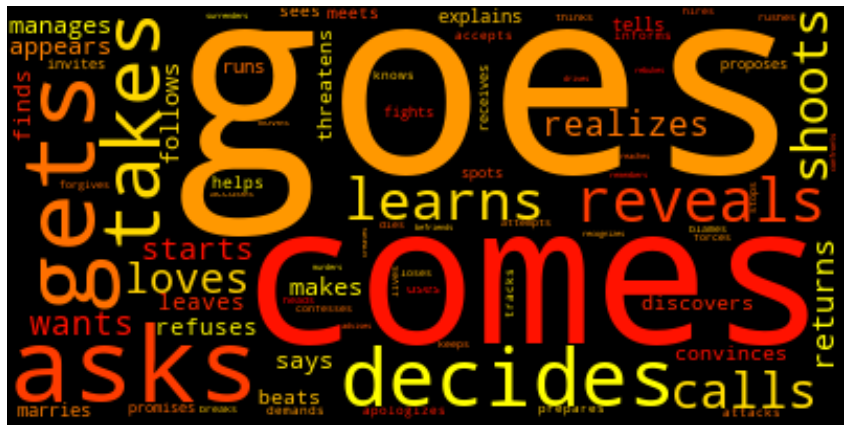

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(colormap='autumn').generate(' '.join(df[5]))

# Display the generated image:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Female** Centrality

In [ ]:
#Importing & printing our dataset
import pandas as pd
datasetf = pd.read_csv(r'/content/female_mentions_centrality.csv')
print(datasetf)

               MOVIE NAME      CAST   FEMALE_MENTIONS   TOTAL CENTRALITY  \
0          Aan Milo Sajna     woman               2.0         222.500000   
1          Aan Milo Sajna   savitri              11.0         868.166667   
2          Aan Milo Sajna   deepali               4.0           0.000000   
3               Abhinetri    anjana               9.0         319.000000   
4           Aag Aur Shola      usha               6.0          48.000000   
...                   ...       ...               ...                ...   
5043  Rab Ne Bana Di Jodi  daughter               1.0         243.000000   
5044  Rab Ne Bana Di Jodi     taani              81.0        6975.333333   
5045              Ghajini    sunita              22.0         565.500000   
5046              Ghajini   kalpana              20.0         624.166667   
5047                Jumbo    mother               4.0         116.833333   

       COUNT   FEMALE_AVG_CENTRALITY  
0       12.0               18.541667  
1      13

In [ ]:
dataf = datasetf.groupby("MOVIE NAME").sum().reset_index()
print(dataf)
dataf.dropna()
dataf

                    MOVIE NAME   FEMALE_MENTIONS   TOTAL CENTRALITY   COUNT  \
0                     100 Days              93.0        2176.600000   765.0   
1                          13B               7.0         222.866667    70.0   
2                         1920              38.0         516.833333   281.0   
3                  1920 London              29.0        1852.366667   305.0   
4           1942: A Love Story              11.0         398.500000    78.0   
...                        ...               ...                ...     ...   
2029                   Zindagi              15.0         359.000000   137.0   
2030  Zindagi Na Milegi Dobara              26.0         531.500000   270.0   
2031         Zindagi Tere Naam              10.0         230.000000    85.0   
2032                  Zubeidaa               0.0        3780.366667   303.0   
2033                     Zulmi               1.0           5.333333     4.0   

       FEMALE_AVG_CENTRALITY  
0                  1

MOVIE NAME   FEMALE_MENTIONS   TOTAL CENTRALITY   COUNT  \
0                     100 Days              93.0        2176.600000   765.0   
1                          13B               7.0         222.866667    70.0   
2                         1920              38.0         516.833333   281.0   
3                  1920 London              29.0        1852.366667   305.0   
4           1942: A Love Story              11.0         398.500000    78.0   
...                        ...               ...                ...     ...   
2029                   Zindagi              15.0         359.000000   137.0   
2030  Zindagi Na Milegi Dobara              26.0         531.500000   270.0   
2031         Zindagi Tere Naam              10.0         230.000000    85.0   
2032                  Zubeidaa               0.0        3780.366667   303.0   
2033                     Zulmi               1.0           5.333333     4.0   

       FEMALE_AVG_CENTRALITY  
0                  17.132995  
1                   3.777401  
2                   3.338479  
3                   6.236925  
4                   5.108974  
...                      ...  
2029                7.517698  
2030                3.729517  
2031               14.756787  
2032               43.263563  
2033                1.333333  

[2034 rows x 5 columns]

**Male** Centrality

In [ ]:
#Importing & printing our dataset
import pandas as pd
datasetm = pd.read_csv(r'/content/male_mentions_centrality.csv')
datasetm

MOVIE NAME       CAST   MALE_MENTIONS   TOTAL CENTRALITY   COUNT  \
0     Aan Milo Sajna       anil            13.0        9219.200000   131.0   
1            Bachpan        tom            11.0          29.000000    59.0   
2            Bachpan     father             5.0         469.333333    63.0   
3            Bachpan      rahim             2.0           0.000000    29.0   
4      Aag Aur Shola     nagesh             4.0          94.000000    38.0   
...              ...        ...             ...                ...     ...   
9348           Jumbo     father            12.0         517.666667   114.0   
9349           Jumbo     akshay             2.0         429.500000    47.0   
9350           Jumbo  bakhtavar             6.0         267.666667    47.0   
9351           Jumbo   elephant            11.0         640.833333   106.0   
9352           Jumbo     prince             5.0          95.666667    52.0   

       MALE_AVG_CENTRALITY  
0                70.375573  
1                 0.491525  
2                 7.449735  
3                 0.000000  
4                 2.473684  
...                    ...  
9348              4.540936  
9349              9.138298  
9350              5.695035  
9351              6.045597  
9352              1.839744  

[9353 rows x 6 columns]

In [ ]:
datam = datasetm.groupby("MOVIE NAME").sum().reset_index()
print(datam)
datam.dropna()
datam

           MOVIE NAME   MALE_MENTIONS   TOTAL CENTRALITY   COUNT  \
0            100 Days            37.0         382.500000   364.0   
1                 13B            32.0         326.500000   305.0   
2              16-Dec            18.0        4477.583333   472.0   
3                1920            43.0         458.333333   379.0   
4         1920 London            66.0        2729.300000   515.0   
...               ...             ...                ...     ...   
2375         Zokkomon             6.0         271.000000    36.0   
2376              Zor            80.0       22214.166663   877.0   
2377         Zubeidaa             0.0        2096.166667   278.0   
2378  Zulm Ki Hukumat            15.0         531.500000   142.0   
2379            Zulmi            19.0         310.500000   117.0   

       MALE_AVG_CENTRALITY  
0                 6.815909  
1                 3.634275  
2                37.364430  
3                 2.106642  
4                 9.555493  
...      

MOVIE NAME   MALE_MENTIONS   TOTAL CENTRALITY   COUNT  \
0            100 Days            37.0         382.500000   364.0   
1                 13B            32.0         326.500000   305.0   
2              16-Dec            18.0        4477.583333   472.0   
3                1920            43.0         458.333333   379.0   
4         1920 London            66.0        2729.300000   515.0   
...               ...             ...                ...     ...   
2375         Zokkomon             6.0         271.000000    36.0   
2376              Zor            80.0       22214.166663   877.0   
2377         Zubeidaa             0.0        2096.166667   278.0   
2378  Zulm Ki Hukumat            15.0         531.500000   142.0   
2379            Zulmi            19.0         310.500000   117.0   

       MALE_AVG_CENTRALITY  
0                 6.815909  
1                 3.634275  
2                37.364430  
3                 2.106642  
4                 9.555493  
...                    ...  
2375              7.527778  
2376             90.434754  
2377             20.640765  
2378             10.629118  
2379             12.584587  

[2380 rows x 5 columns]

In [ ]:
import pandas as pd
data_merge=pd.merge(dataf, datam, on="MOVIE NAME")
data_merge.dropna()
data_merge = data_merge[data_merge[' FEMALE_MENTIONS']!=0]
data_merge = data_merge[data_merge[' MALE_MENTIONS']!=0]
data_merge

MOVIE NAME   FEMALE_MENTIONS   TOTAL CENTRALITY_x  \
0                     100 Days              93.0          2176.600000   
1                          13B               7.0           222.866667   
2                         1920              38.0           516.833333   
3                  1920 London              29.0          1852.366667   
4           1942: A Love Story              11.0           398.500000   
...                        ...               ...                  ...   
1915            Zindaggi Rocks               9.0          1159.416667   
1916                   Zindagi              15.0           359.000000   
1917  Zindagi Na Milegi Dobara              26.0           531.500000   
1918         Zindagi Tere Naam              10.0           230.000000   
1920                     Zulmi               1.0             5.333333   

       COUNT_x   FEMALE_AVG_CENTRALITY   MALE_MENTIONS   TOTAL CENTRALITY_y  \
0        765.0               17.132995            37.0           382.500000   
1         70.0                3.777401            32.0           326.500000   
2        281.0                3.338479            43.0           458.333333   
3        305.0                6.236925            66.0          2729.300000   
4         78.0                5.108974            67.0          2334.000000   
...        ...                     ...             ...                  ...   
1915     125.0               63.436204             7.0           604.333333   
1916     137.0                7.517698            14.0            48.000000   
1917     270.0                3.729517            78.0          1701.500000   
1918      85.0               14.756787             8.0           278.000000   
1920       4.0                1.333333            19.0           310.500000   

       COUNT_y   MALE_AVG_CENTRALITY  
0        364.0              6.815909  
1        305.0              3.634275  
2        379.0              2.106642  
3        515.0              9.555493  
4        731.0             30.005354  
...        ...                   ...  
1915      96.0             17.049423  
1916      81.0              2.456897  
1917     802.0             17.642882  
1918      71.0             11.499334  
1920     117.0             12.584587  

[1718 rows x 9 columns]

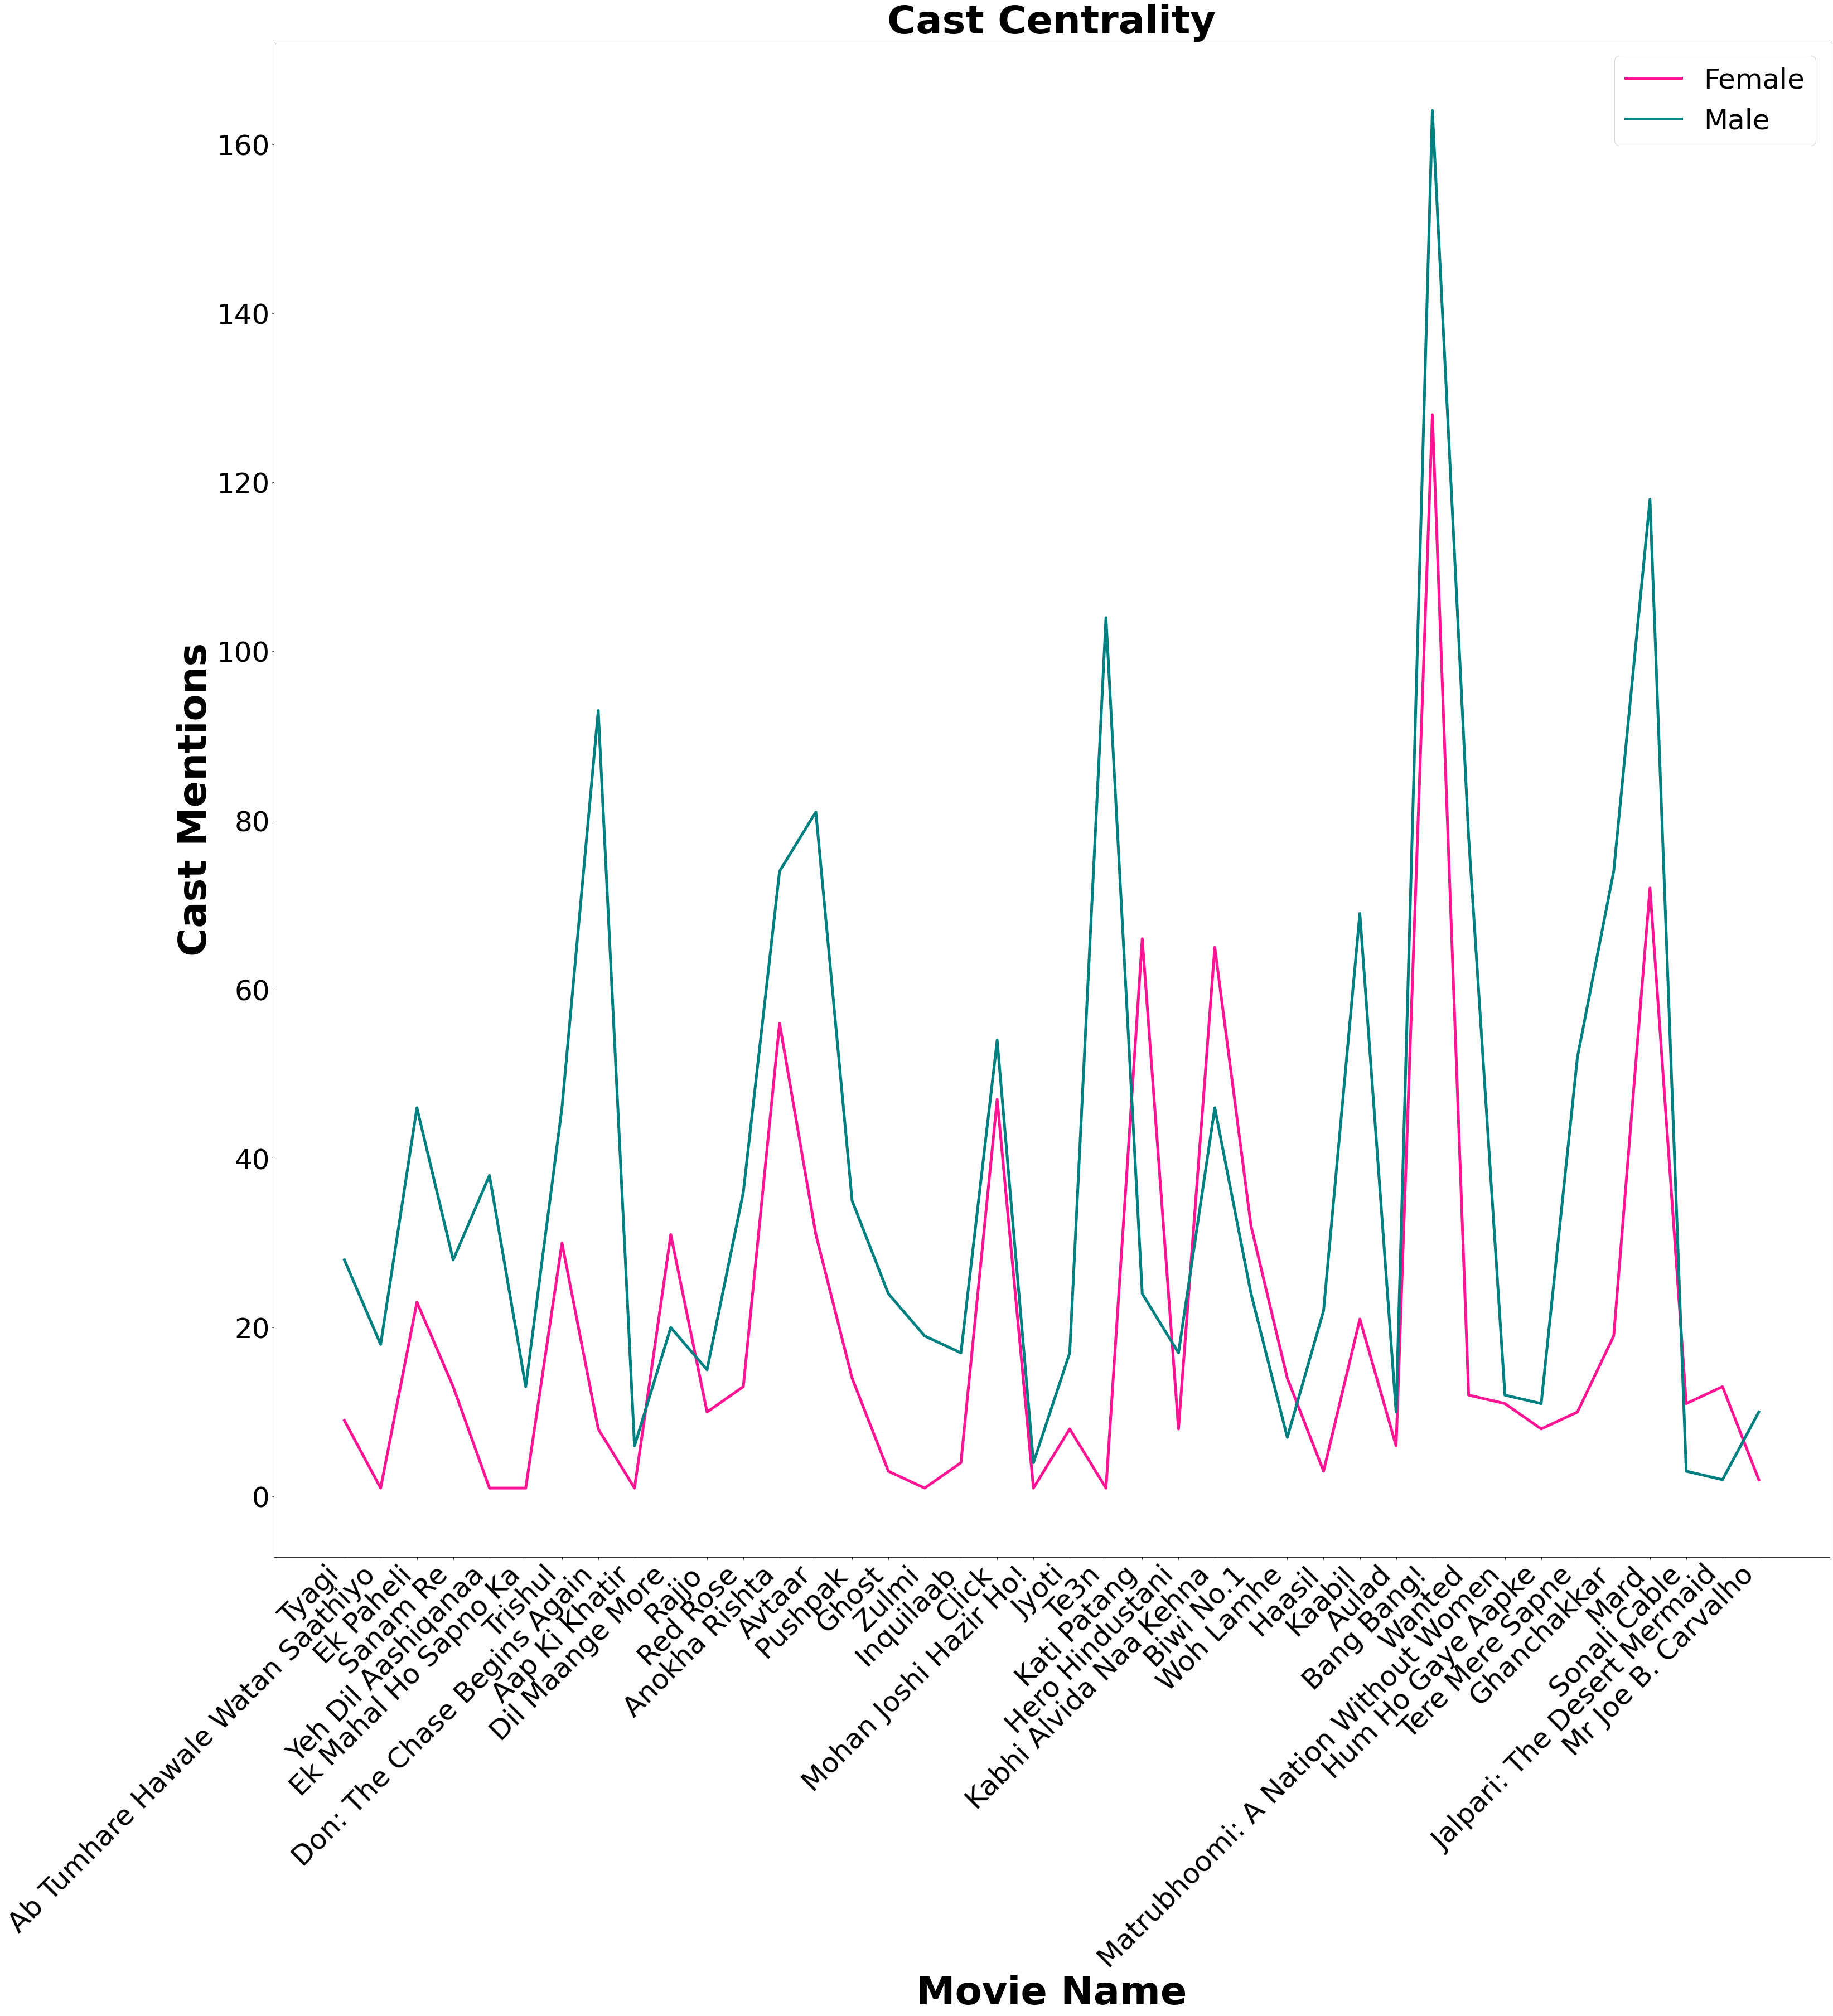

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt
#from importlib import reload
#plt=reload(plt)

data_final = data_merge.sample(40)

flinex = data_final["MOVIE NAME"]
fliney = data_final[' FEMALE_MENTIONS']

mlinex = data_final["MOVIE NAME"]
mliney = data_final[' MALE_MENTIONS']

fig = plt.subplots(figsize =(50, 50))

#plt.figure(figsize=(150,150))

plt.plot(flinex, fliney, color='deeppink', label="Female",linewidth=5)
plt.plot(mlinex, mliney, color='teal', label="Male",linewidth=5)

plt.title("Cast Centrality",fontweight ='bold', fontsize = 70)
plt.xlabel('Movie Name',fontweight ='bold', fontsize = 70)
plt.ylabel('Cast Mentions',fontweight ='bold', fontsize = 70)

plt.rc('xtick', labelsize=50) 
plt.xticks(rotation=45, ha='right')

plt.rc('ytick', labelsize=50) 
#frame1.axes.get_xaxis().set_visible(False)
plt.legend(fontsize=50)
plt.show()

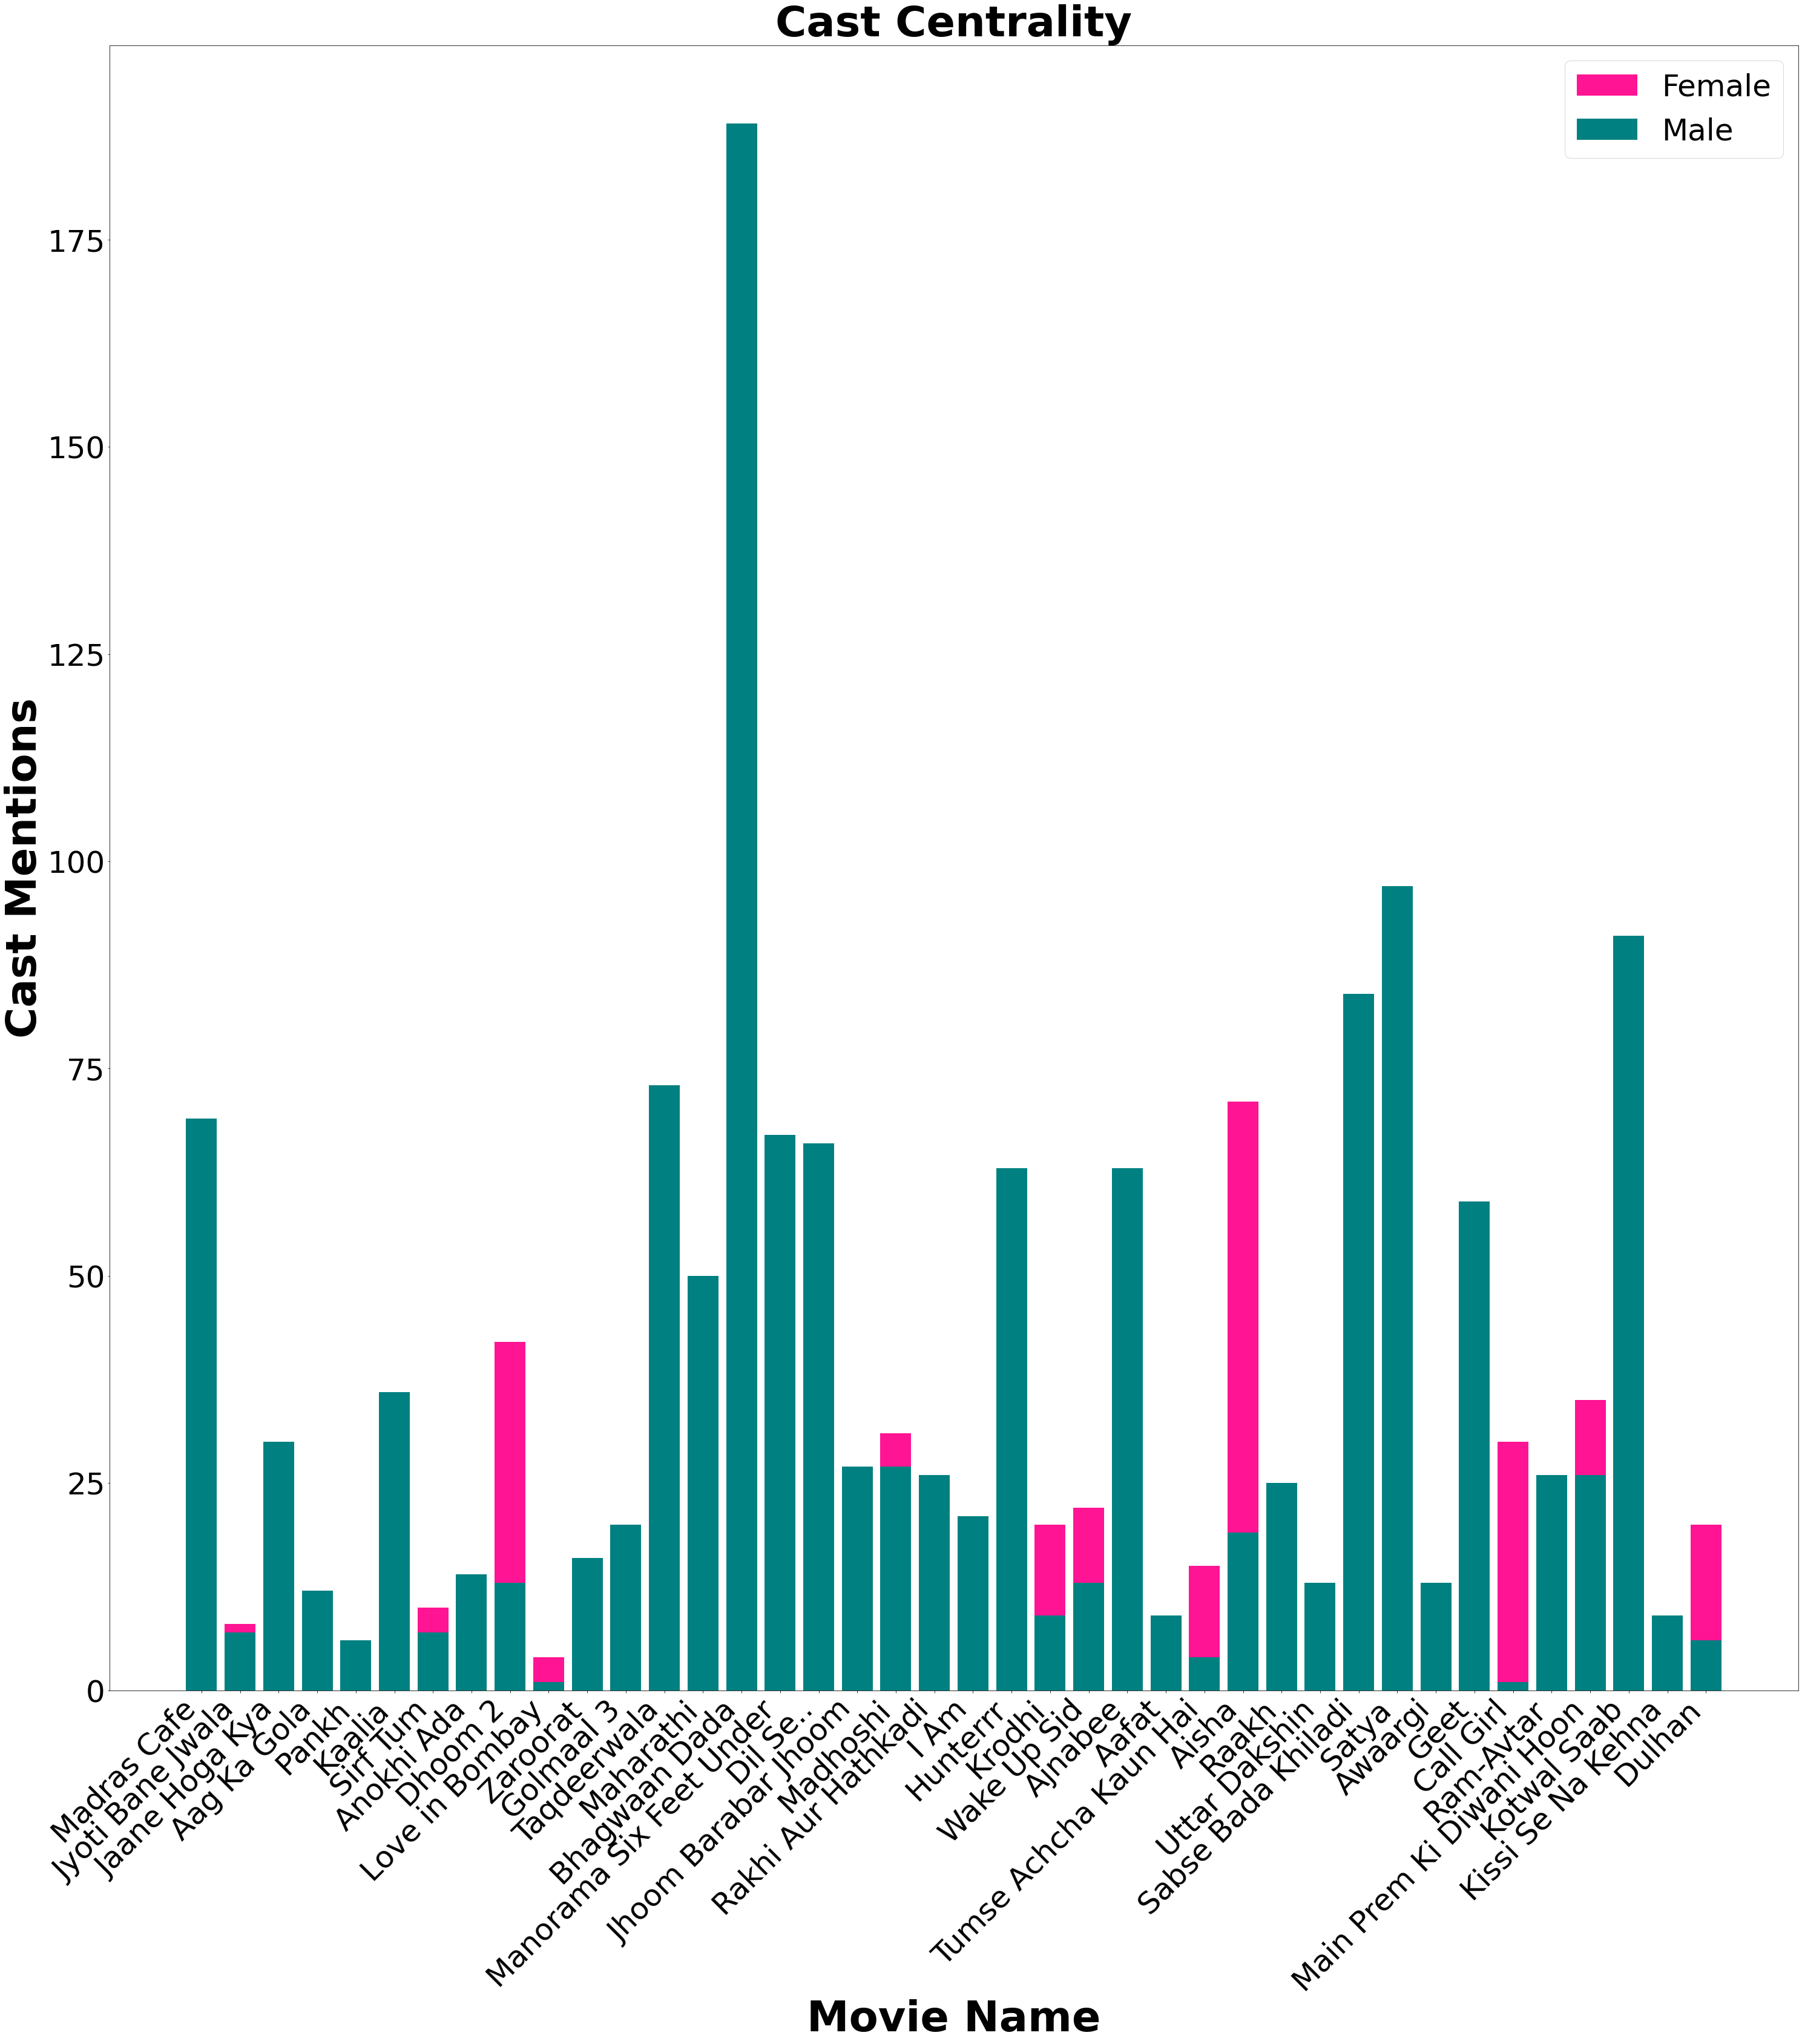

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt
#from importlib import reload
#plt=reload(plt)

data_final = data_merge.sample(40)

flinex = data_final["MOVIE NAME"]
fliney = data_final[' FEMALE_MENTIONS']

mlinex = data_final["MOVIE NAME"]
mliney = data_final[' MALE_MENTIONS']

fig = plt.subplots(figsize =(50, 50))

#plt.figure(figsize=(150,150))

plt.bar(flinex, fliney, color='deeppink', label="Female",linewidth=5)
plt.bar(mlinex, mliney, color='teal', label="Male",linewidth=5)

plt.title("Cast Centrality",fontweight ='bold', fontsize = 70)
plt.xlabel('Movie Name',fontweight ='bold', fontsize = 70)
plt.ylabel('Cast Mentions',fontweight ='bold', fontsize = 70)

plt.rc('xtick', labelsize=50) 
plt.xticks(rotation=45, ha='right')

plt.rc('ytick', labelsize=50) 
#frame1.axes.get_xaxis().set_visible(False)
plt.legend(fontsize=50)
plt.show()

**Song** Data

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/songsDB.csv')
dataset.dropna()
dataset

movieTitle_year         singer_name   gender  song_count  \
0            Aag Aur Daag_1970         Asha Bhosle   FEMALE           3   
1            Aag Aur Daag_1970       Mohammed Rafi     MALE           1   
2          Aan Milo Sajna_1970       Kishore Kumar     MALE           2   
3          Aan Milo Sajna_1970     Lata Mangeshkar   FEMALE           3   
4          Aan Milo Sajna_1970       Mohammed Rafi     MALE           2   
...                        ...                 ...      ...         ...   
10470  Saathi (1991 film)_1991    Anuradha Paudwal   FEMALE           4   
10471  Saathi (1991 film)_1991     Jolly Mukherjee     MALE           1   
10472  Saathi (1991 film)_1991  Saathi (1991 film)  UNKNOWN           2   
10473  Saathi (1991 film)_1991      Anwar (singer)  UNKNOWN           1   
10474  Saathi (1991 film)_1991        Udit Narayan     MALE           1   

       Unnamed: 4  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
10470         NaN  
10471         NaN  
10472         NaN  
10473         NaN  
10474         NaN  

[10475 rows x 5 columns]

In [ ]:
df = dataset.groupby("gender").sum().reset_index()
print(df)
df.dropna()
df

              gender  song_count  Unnamed: 4
0    1st Baron Sinha           1         0.0
1         Baat Gayi?          10         0.0
2       Fresh n' New           1         0.0
3            Itahari           2         0.0
4             Jaipur           1         0.0
5        Me Aur Main           3         0.0
6     No. 6 (Chopin)           1         0.0
7             Poland           1         0.0
8     Poste Restante           1         0.0
9    West Azerbaijan           1         0.0
10            FEMALE        8100         0.0
11              MALE        7653         0.0
12           UNKNOWN        3847         0.0


gender  song_count  Unnamed: 4
0    1st Baron Sinha           1         0.0
1         Baat Gayi?          10         0.0
2       Fresh n' New           1         0.0
3            Itahari           2         0.0
4             Jaipur           1         0.0
5        Me Aur Main           3         0.0
6     No. 6 (Chopin)           1         0.0
7             Poland           1         0.0
8     Poste Restante           1         0.0
9    West Azerbaijan           1         0.0
10            FEMALE        8100         0.0
11              MALE        7653         0.0
12           UNKNOWN        3847         0.0

**Songs Frequency** Data

In [ ]:
#Importing & printing our dataset
import pandas as pd
dataset = pd.read_csv(r'/content/songsFrequency.csv')
dataset.dropna()
dataset

MOVIE NAME  YEAR   MALE SINGER COUNT  \
0                   Raabta (film)_2017  2017                   5   
1                    Luv U Soniyo_2013  2013                   4   
2                        Sahibaan_1993  1993                   2   
3     Baap Numbri Beta Dus Numbri_1990  1990                   1   
4                Jyoti Bane Jwala_1980  1980                   3   
...                                ...   ...                 ...   
2444              Jhoota Kahin Ka_1979  1979                   2   
2445                 Ghar Ki Laaj_1993  1993                   3   
2446                Chandra Mukhi_1993  1993                   3   
2447               Jai Bangladesh_1971  1971                   2   
2448                Cinema Cinema_1979  1979                   0   

       FEMALE SINGER COUNT   MALE SONG COUNT   FEMALE SONG COUNT  
0                        2                 8                   2  
1                        1                 6                   1  
2                        2                 3                   6  
3                        2                 1                   4  
4                        3                 4                   5  
...                    ...               ...                 ...  
2444                     1                 5                   5  
2445                     1                 6                   2  
2446                     3                 6                   5  
2447                     4                 4                   8  
2448                     0                 0                   0  

[2449 rows x 6 columns]

In [ ]:
df = dataset.groupby("YEAR").sum().reset_index()
print(df)
df.dropna()
df

    YEAR   MALE SINGER COUNT   FEMALE SINGER COUNT   MALE SONG COUNT  \
0   1970                 103                   114               188   
1   1971                 155                   150               325   
2   1972                 113                   102               237   
3   1973                 101                   109               227   
4   1974                  97                    99               197   
5   1975                 105                    88               189   
6   1976                 102                    97               211   
7   1977                 170                   152               342   
8   1978                  84                    97               164   
9   1979                 101                   106               201   
10  1980                  97                   104               182   
11  1981                 105                    86               182   
12  1982                 145                   176              

YEAR   MALE SINGER COUNT   FEMALE SINGER COUNT   MALE SONG COUNT  \
0   1970                 103                   114               188   
1   1971                 155                   150               325   
2   1972                 113                   102               237   
3   1973                 101                   109               227   
4   1974                  97                    99               197   
5   1975                 105                    88               189   
6   1976                 102                    97               211   
7   1977                 170                   152               342   
8   1978                  84                    97               164   
9   1979                 101                   106               201   
10  1980                  97                   104               182   
11  1981                 105                    86               182   
12  1982                 145                   176               287   
13  1983                  94                    95               200   
14  1984                 115                   143               250   
15  1985                 113                   151               237   
16  1986                  86                   140               166   
17  1987                  90                   113               155   
18  1988                  94                   152               180   
19  1989                  70                   111               133   
20  1990                  74                   153               121   
21  1991                 149                   223               275   
22  1992                 170                   197               341   
23  1993                 159                   194               296   
24  1994                 192                   189               409   
25  1995                 179                   158               362   
26  1996                 168                   140               318   
27  1997                 188                   144               302   
28  1998                 167                   137               297   
29  1999                 193                   149               356   
30  2000                 181                   123               285   
31  2001                   3                     3                 5   
32  2007                   2                     1                 5   
33  2009                 151                    76               256   
34  2010                 238                   136               387   
35  2011                 190                   107               304   
36  2012                 232                   125               360   
37  2013                 262                   149               392   
38  2014                 255                   146               404   
39  2015                  78                    50               121   
40  2016                 256                   127               359   
41  2017                 131                    70               169   

     FEMALE SONG COUNT  
0                  229  
1                  406  
2                  261  
3                  310  
4                  245  
5                  219  
6                  213  
7                  367  
8                  191  
9                  228  
10                 195  
11                 197  
12                 383  
13                 221  
14                 329  
15                 317  
16                 270  
17                 259  
18                 362  
19                 235  
20                 302  
21                 503  
22                 461  
23                 415  
24                 400  
25                 312  
26                 284  
27                 254  
28                 252  
29                 310  
30                 231  
31                   9  
32                   1  
33                 134  
34                 226  
35     

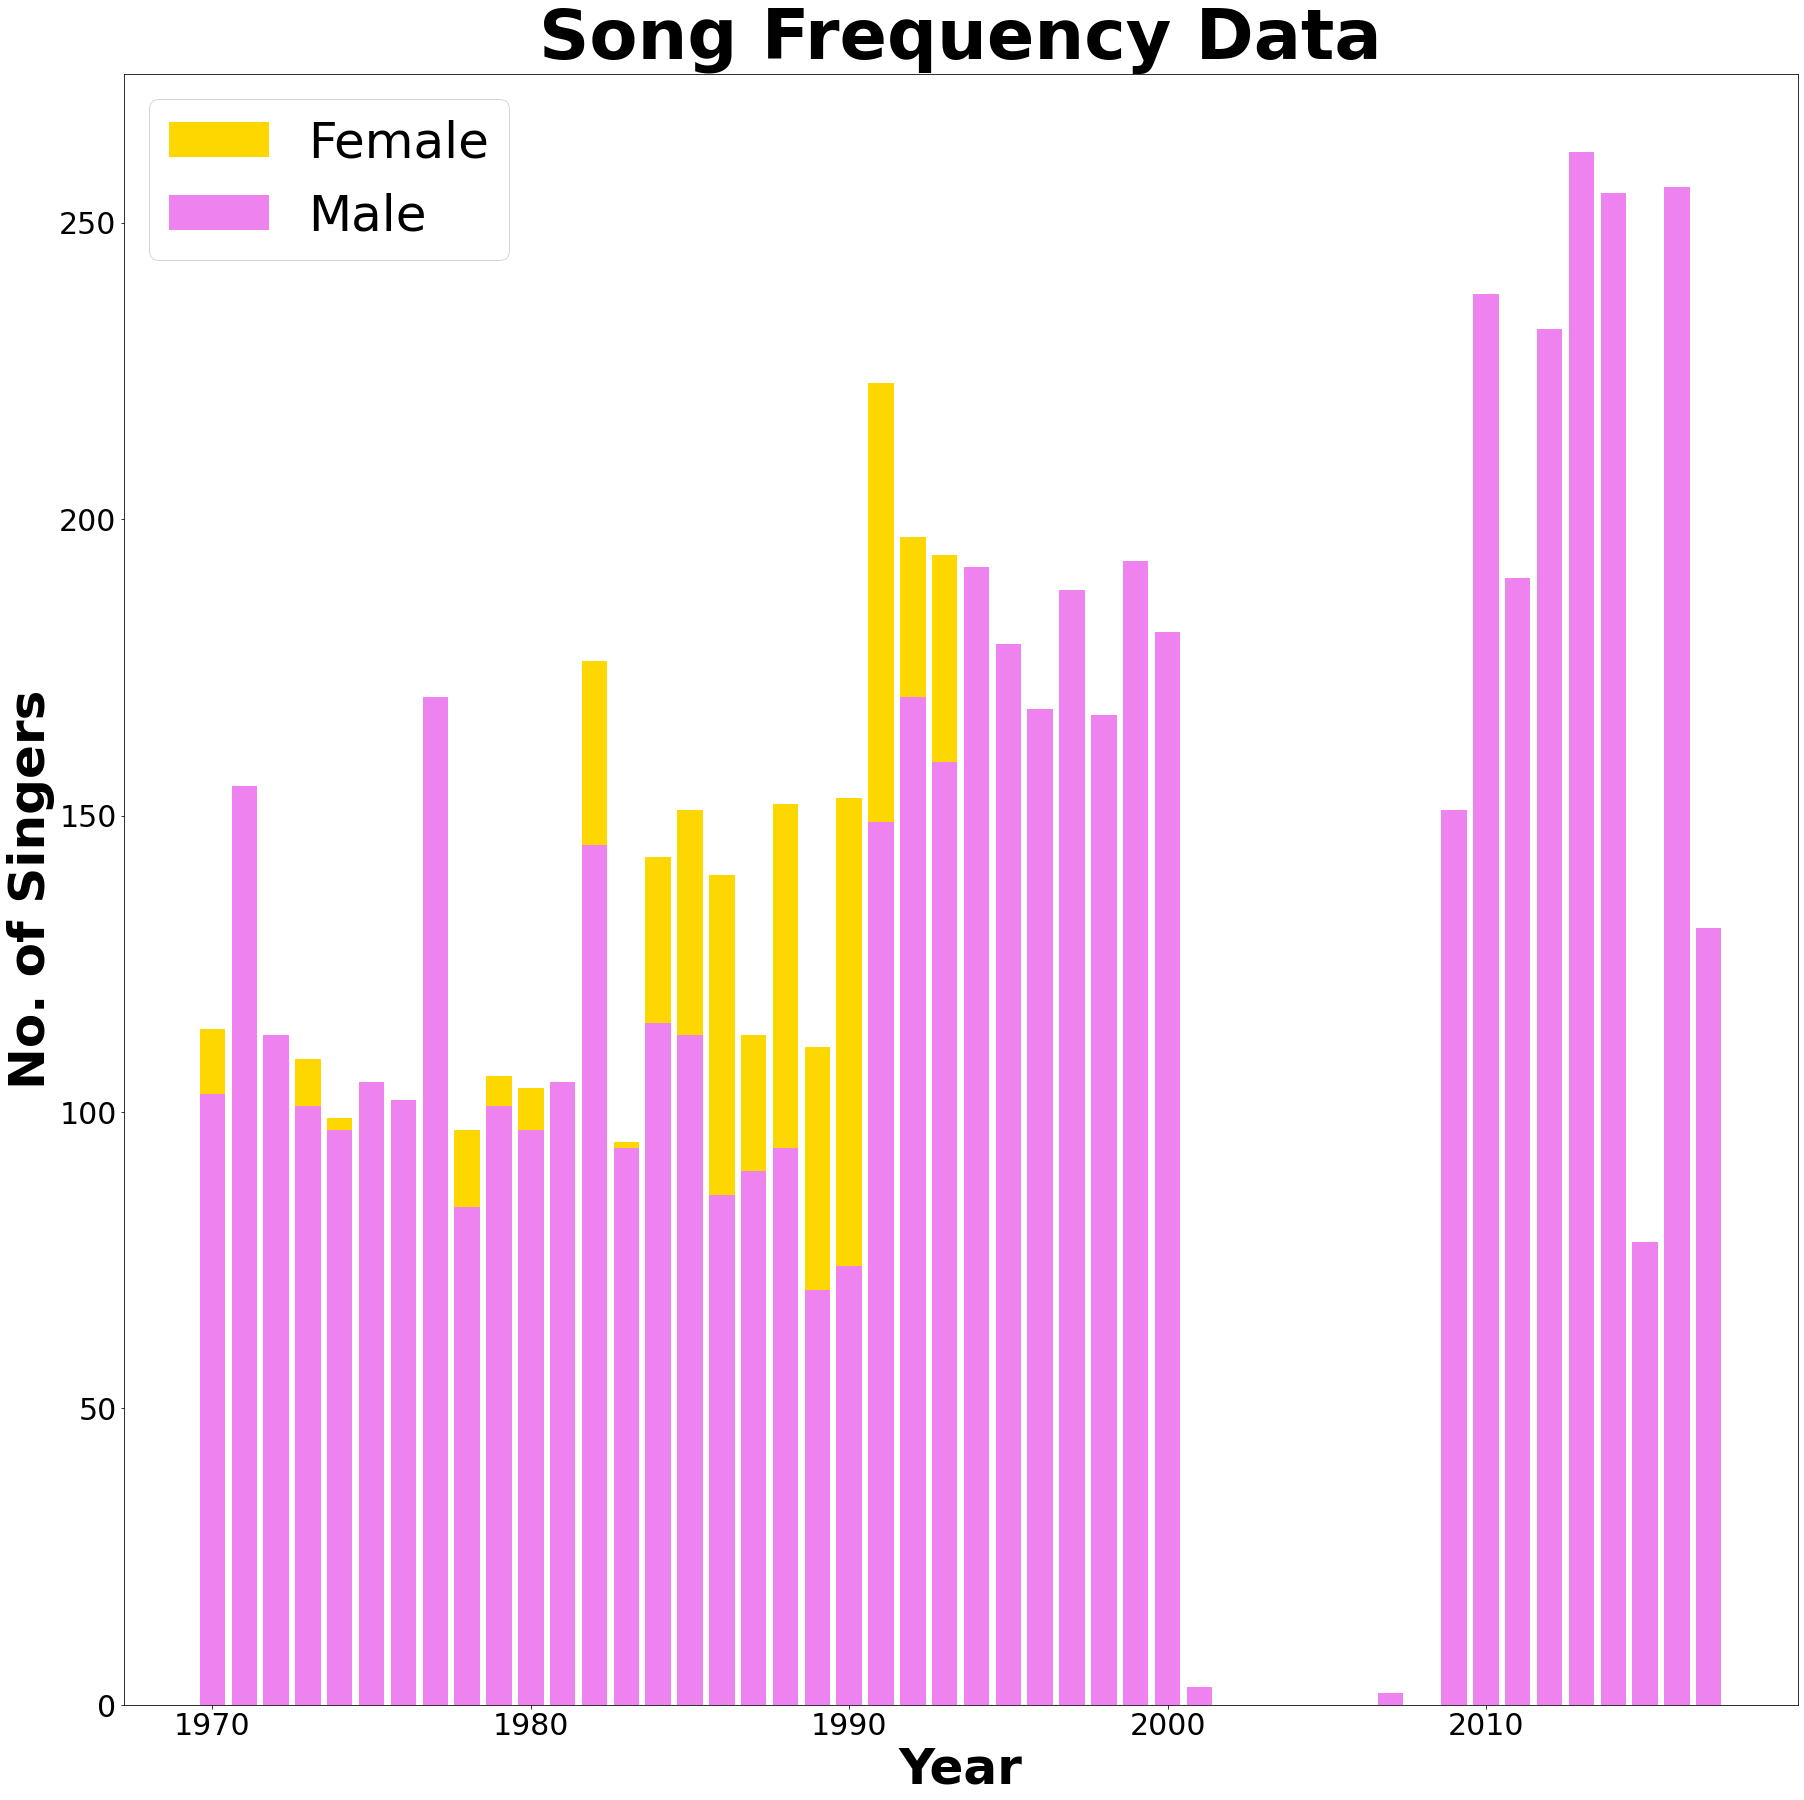

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.subplots(figsize =(30, 30))

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

plt.bar(df['YEAR'], df[' FEMALE SINGER COUNT'], color='gold', label="Female")
plt.bar(df['YEAR'], df[' MALE SINGER COUNT'], color='violet', label="Male")

plt.title("Song Frequency Data",fontweight ='bold', fontsize = 70)
plt.xlabel('Year', fontweight ='bold', fontsize = 50)
plt.ylabel('No. of Singers', fontweight ='bold', fontsize = 50)

plt.legend(fontsize=50)
plt.show()


**Scripts Data**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(uploaded[fn])))

Saving Rockstar.pdf to Rockstar.pdf
User uploaded file "Rockstar.pdf" with length 610407 bytes


In [ ]:
!pip install -q pypdf2

     |████████████████████████████████| 77 kB 3.8 MB/s 


In [ ]:
from PyPDF2 import PdfFileReader
import io

pdf = PdfFileReader(io.BytesIO(uploaded['Rockstar.pdf']))
print ("pdf has %d pages." % pdf.getNumPages())

pdf has 271 pages.


In [ ]:
first_page = pdf.getPage(0)

print(first_page.extractText())
type(first_page)

Rockstar 
Script 
Version 5 
Opening Montage 
 [A] 
 Fade in. A Jordan impersonator Ð strumming the guitar, singing a Jordan song. 
He is wearing the clothes and attitude of Jordan, and a wig for his hair.  
ÔJo bhi mainÉ kehna chahoonÉÓ.  
Back to back with him is another Jordan impersonator, strumming the guitar 
and singing the same song.  
Bright, cheerful folks sitting around the two singers in the lawn, clapping, 
cheering, singing along.  
A street painting of Jordan Ð around which fans are sitting. A girl stretches 
across and kisses JordanÕs painting.  
 Arena de Verona, where JordanÕs concert is going to begin shortly, is seen in 
the background. 
 [B]  Free punch being doled out from barrels. The fat, genial man serving the 
punch is wearing a Jordan T shirt. 
Throngs of people, holding up their glasses.  
Festive atmosphere. 
[C] 
Merchandize of Jordan and the show being sold at counters.  
  Rows of Jordan T shirts, accessories, etcetras. Some people trying out.  
! 1


PyPDF2.pdf.PageObject

In [ ]:
pip install textract

In [ ]:
pip install nltk

In [ ]:
pip install PyPDF2

In [ ]:
import PyPDF2

In [ ]:
f = open('/content/Rockstar.pdf','rb')

In [ ]:
#pdfFileReader() reads the text  form the pdf
pdf_reader = PyPDF2.PdfFileReader(f) 
#the following lines of code will output the number of pages of the pdf
print(pdf_reader.numPages)
#getPage()reads the text of a specific page. Here the parameter 0 indicates the first page of the pdf
page_one = pdf_reader.getPage(0)
page_one_text = page_one.extractText()
#Finally the extractText() extracts the the texts in a text format of page 1. 
page_one_text

271


'Rockstar \nScript \nVersion 5 \nOpening Montage \n [A] \n Fade in. A Jordan impersonator Ð strumming the guitar, singing a Jordan song. \nHe is wearing the clothes and attitude of Jordan, and a wig for his hair.  \nÔJo bhi mainÉ kehna chahoonÉÓ.  \nBack to back with him is another Jordan impersonator, strumming the guitar \nand singing the same song.  \nBright, cheerful folks sitting around the two singers in the lawn, clapping, \ncheering, singing along.  \nA street painting of Jordan Ð around which fans are sitting. A girl stretches \nacross and kisses JordanÕs painting.  \n Arena de Verona, where JordanÕs concert is going to begin shortly, is seen in \nthe background. \n [B]  Free punch being doled out from barrels. The fat, genial man serving the \npunch is wearing a Jordan T shirt. \nThrongs of people, holding up their glasses.  \nFestive atmosphere. \n[C] \nMerchandize of Jordan and the show being sold at counters.  \n  Rows of Jordan T shirts, accessories, etcetras. Some people

In [ ]:
f = open('/content/Rockstar.pdf','rb')
# List of every page's text.
# The index will correspond to the page number.
pdf_text = [0]  # zero is a placehoder to make page 1 = index 1
pdf_reader = PyPDF2.PdfFileReader(f)
for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())

In [ ]:
sample = pdf_text[31]
print(sample)

Janardan Haan. I love you.  
  She continues to look at Janardan.  
Janardan Girlfriend ban ja meri. 
Heer  Tumhein dikh raha hai ki ye log hans rahe hain tumpar? 
Janardan Sirf tu dikh rahi hai mujhe.  
Heer Main dikh rahi hoon, right? To ghaur se dekho main kya keh rahi hoon 
Ð Bugger OffÉ 
Janardan Tu aur main rock kar denge bata raha hoonÉ Soch ke dekh. 
Heer  HeyÉ Are you stupid? 
Janardan No. Only crazy for you baby.   
Heer  Okay enough. Just get lost now.  
Janardan Sure? 
Heer Am I sure? Ek second, sochne do mujheÉ Haan, main sure hoon you 
idiot, niklo yahan seÉ  
Janardan Tu mera dil tod rahi hai HeerÉ 
Heer Suno tumÉ  
Janardan JJÉ 
Heer  Dobara shakal mat dikhanaÉ Sun rahe ho?  
Janardan Pakka sure? 
Heer  Bugger off.  
Janardan Okay. 
He looks down and nods to himself, as though compromising to his cruel fate. 
He looks up at her again.  
Janardan Okay.  
! 31


In [ ]:
import re

In [ ]:
pattern = 'Janardan\s(.)+'
hitlist = re.findall(pattern,sample)
print(hitlist)
len(hitlist)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


11

In [ ]:
import PyPDF2
import re

object = PyPDF2.PdfFileReader(f)

NumPages = object.getNumPages()

mString = "(Janardan|Jordan)\s(.)+"
fString = "(Heer)\s(.)+"

mc = 0 
fc = 0

for i in range(0, NumPages):
    PageObj = object.getPage(i)
    print("this is page " + str(i)) 
    Text = PageObj.extractText() 
    #print(Text)
    mdialogue = len([*re.finditer(mString, Text)])
    fdialogue = len([*re.finditer(fString, Text)])
    print(mdialogue)
    print(fdialogue)
    mc = mc + mdialogue
    fc = fc + fdialogue
print("Total male lead cast dialogues are "+ str(mc))
print("Total female lead cast dialogues are "+ str(fc))

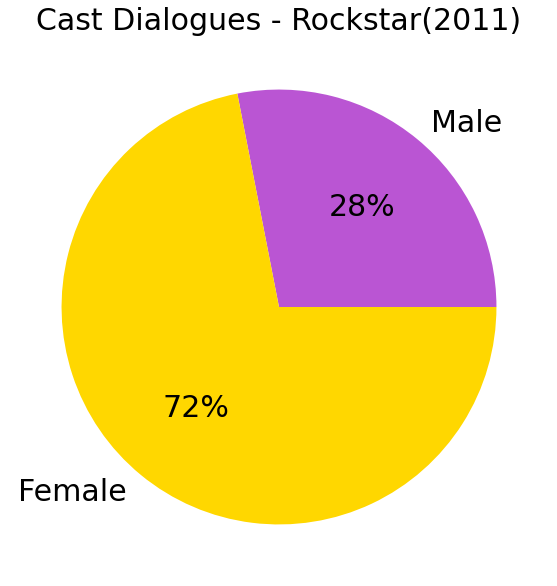

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [mc, fc]
labels = ['Male', 'Female']
colors = ['mediumorchid','gold']

#colors = sns.color_palette('Accent')
plt.figure(figsize=(10,10))
plt.title("Cast Dialogues - Rockstar(2011)", fontsize = 30 )
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 30})
plt.show()

In [ ]:
f.close()

In [ ]:
f = open('/content/Queen.pdf','rb')

In [ ]:
import PyPDF2
import re

object = PyPDF2.PdfFileReader(f)

NumPages = object.getNumPages()

mString = "(VIJAY)\s(.)+"
fString = "(RANI)\s(.)+"

mc = 0 
fc = 0

for i in range(0, NumPages):
    PageObj = object.getPage(i)
    print("this is page " + str(i)) 
    Text = PageObj.extractText() 
    #print(Text)
    mdialogue = len([*re.finditer(mString, Text)])
    fdialogue = len([*re.finditer(fString, Text)])
    print(mdialogue)
    print(fdialogue)
    mc = mc + mdialogue
    fc = fc + fdialogue
print("Total male lead cast dialogues are "+ str(mc))
print("Total female lead cast dialogues are "+ str(fc))

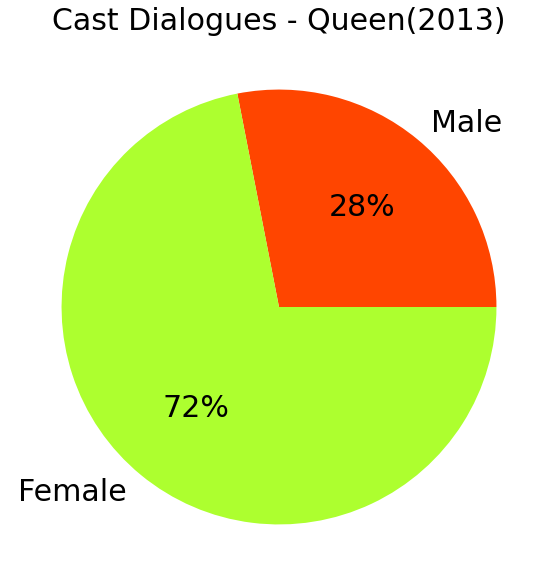

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [mc, fc]
labels = ['Male', 'Female']
colors = ['orangered','greenyellow']

#colors = sns.color_palette('Accent')
plt.figure(figsize=(10,10))
plt.title("Cast Dialogues - Queen(2013)", fontsize = 30 )
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 30})
plt.show()

In [ ]:
f.close()

In [ ]:
f = open('/content/Kaminey.pdf','rb')

In [ ]:
import PyPDF2
import re

object = PyPDF2.PdfFileReader(f)

NumPages = object.getNumPages()

mString = "(GUDDU)(\n|\s)*(.)+"
fString = "(SWEETY)(\n|\s)*(.)+\n"

mc = 0 
fc = 0

for i in range(0, NumPages):
    PageObj = object.getPage(i)
    print("this is page " + str(i)) 
    Text = PageObj.extractText() 
    print(Text)
    mdialogue = len([*re.finditer(mString, Text)])
    fdialogue = len([*re.finditer(fString, Text)])
    print(mdialogue)
    print(fdialogue)
    mc = mc + mdialogue
    fc = fc + fdialogue
print("Total male lead cast dialogues are "+ str(mc))
print("Total female lead cast dialogues are "+ str(fc))

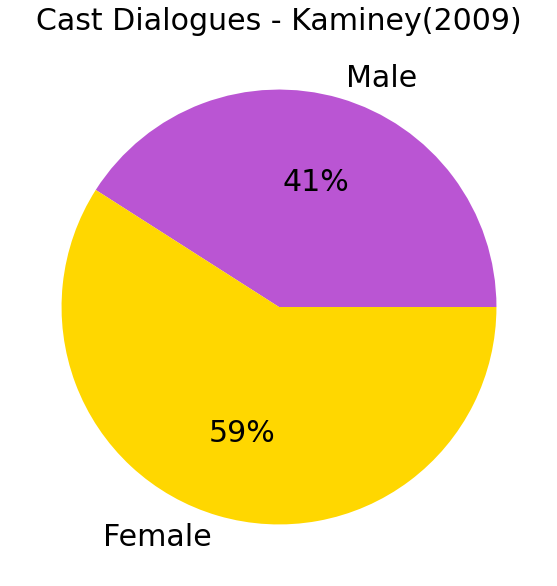

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [mc, fc]
labels = ['Male', 'Female']
colors = ['mediumorchid','gold']

#colors = sns.color_palette('Accent')
plt.figure(figsize=(10,10))
plt.title("Cast Dialogues - Kaminey(2009)", fontsize = 30 )
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 30})
plt.show()

In [ ]:
f.close()

In [ ]:
f = open('/content/Haider.pdf','rb')

In [ ]:
import PyPDF2
import re

object = PyPDF2.PdfFileReader(f)

NumPages = object.getNumPages()

mString = "(HAIDER)(\n|\s)*(.)+"
fString = "(GHAZALA)(\n|\s)*(.)+\n"

mc = 0 
fc = 0

for i in range(0, NumPages):
    PageObj = object.getPage(i)
    print("this is page " + str(i)) 
    Text = PageObj.extractText() 
    print(Text)
    mdialogue = len([*re.finditer(mString, Text)])
    fdialogue = len([*re.finditer(fString, Text)])
    print(mdialogue)
    print(fdialogue)
    mc = mc + mdialogue
    fc = fc + fdialogue
print("Total male lead cast dialogues are "+ str(mc))
print("Total female lead cast dialogues are "+ str(fc))

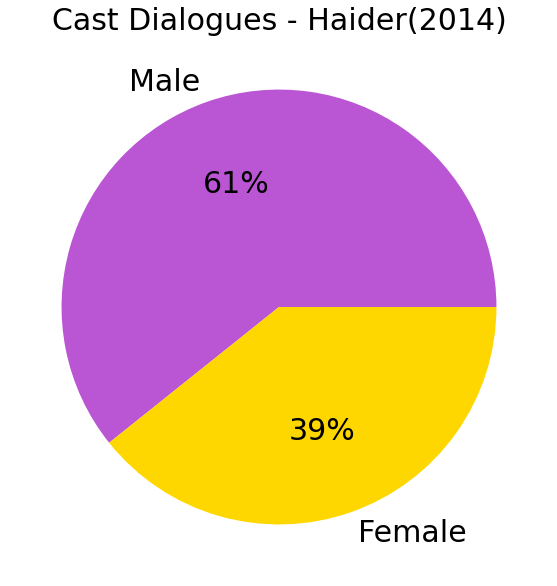

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [mc, fc]
labels = ['Male', 'Female']
colors = ['mediumorchid','gold']

#colors = sns.color_palette('Accent')
plt.figure(figsize=(10,10))
plt.title("Cast Dialogues - Haider(2014)", fontsize = 30 )
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 30})
plt.show()

In [ ]:
f.close()

In [ ]:
f = open('/content/NEERJA.pdf','rb')

In [ ]:
import PyPDF2
import re

object = PyPDF2.PdfFileReader(f)

NumPages = object.getNumPages()

mString = "(KHALIL)(\n|\s)*(.)+"
fString = "(NEERJA)(\n|\s)*(.)+\n"

mc = 0 
fc = 0

for i in range(0, NumPages):
    PageObj = object.getPage(i)
    print("this is page " + str(i)) 
    Text = PageObj.extractText() 
    print(Text)
    mdialogue = len([*re.finditer(mString, Text)])
    fdialogue = len([*re.finditer(fString, Text)])
    print(mdialogue)
    print(fdialogue)
    mc = mc + mdialogue
    fc = fc + fdialogue
print("Total male lead cast dialogues are "+ str(mc))
print("Total female lead cast dialogues are "+ str(fc))

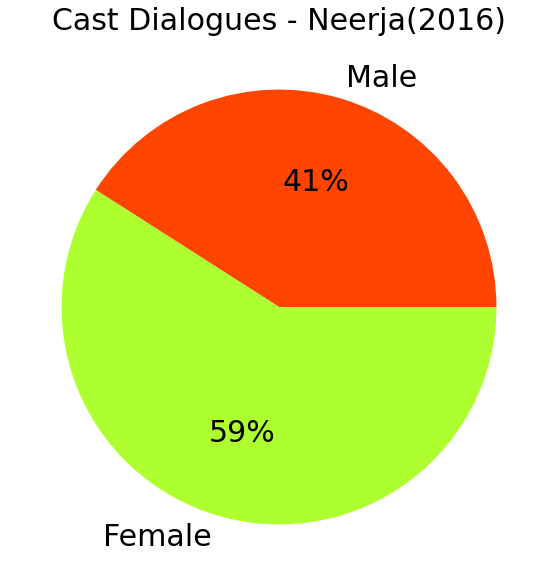

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [mc, fc]
labels = ['Male', 'Female']
colors = ['orangered','greenyellow']

#colors = sns.color_palette('Accent')
plt.figure(figsize=(10,10))
plt.title("Cast Dialogues - Neerja(2016)", fontsize = 30 )
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 30})
plt.show()

In [ ]:
f.close()